In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ToyotaCorolla.csv',encoding = 'latin')
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

In [3]:
df.head()

Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

In [4]:
df.T

0     \
Id                                                            1   
Model             TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors   
Price                                                     13500   
Age_08_04                                                    23   
Mfg_Month                                                    10   
Mfg_Year                                                   2002   
KM                                                        46986   
Fuel_Type                                                Diesel   
HP                                                           90   
Met_Color                                                     1   
Color                                                      Blue   
Automatic                                                     0   
cc                                                         2000   
Doors                                                         3   
Cylinders                                                     4   
Gears                                                         5   
Quarterly_Tax                                               210   
Weight                                                     1165   
Mfr_Guarantee                                                 0   
BOVAG_Guarantee                                               1   
Guarantee_Period                                              3   
ABS                                                           1   
Airbag_1                                                      1   
Airbag_2                                                      1   
Airco                                                         0   
Automatic_airco                                               0   
Boardcomputer                                                 1   
CD_Player                                                     0   
Central_Lock                                                  1   
Powered_Windows                                               1   
Power_Steering                                                1   
Radio                                                         0   
Mistlamps                                                     0   
Sport_Model                                                   0   
Backseat_Divider                                              1   
Metallic_Rim                                                  0   
Radio_cassette                                                0   
Tow_Bar                                                       0   

                                                           1     \
Id                                                            2   
Model             TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors   
Price                                                     13750   
Age_08_04                                                    23   
Mfg_Month                                                    10   
Mfg_Year                                                   2002   
KM                                                        72937   
Fuel_Type                                                Diesel   
HP                                                           90   
Met_Color                                                     1   
Color                                                    Silver   
Automatic                                                     0   
cc                                                         2000   
Doors                                                         3   
Cylinders                                                     4   
Gears                                                         5   
Quarterly_Tax                                               210   
Weight                                                     1165   
Mfr_Guarantee                                                 0   
BOVAG_Guarantee                                               1   
Guarantee_Period                      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [6]:
df.shape

(1436, 38)

In [7]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [8]:
df.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           cc  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Central_Lock  Powered_Windows  Power_Steering        Radio  \
count   1436.000000      1436.000000     1436.000000  1436.000000   
mean       0.580084         0.561978        0.977716     0.146240   
std        0.493717         0.496317        0.147657     0.353469   
min        0.000000         0.000000        0.000000     0.000000   
25%        0.000000         0.000000        1.000000     0.000000   
50%        1.000000         1.000000        1.000000     0.000000   
75%        1.000000         1.000000        1.000000     0.000000   
max        1.000000         1.000000        1.000000     1.000000   

         Mistlamps  Sport_Model  Backseat_Divider  Metallic_Rim  \
count  1436.000000  1436.000000       1436.000000   1436.000000   
mean      0.256964     0.300139          0.770195      0.204735   
std       0.437111     0.458478          0.420854      0.403649   
min       0.000000     0.000000          0.000000      0.000000   
25%       0.000000     0.000000          1.000000      0.000000   
50%       0.000000     0.000000          1.000000      0.000000   
75%       1.000000     1.000000          1.000000      0.000000   
max       1.000000     1.000000          1.000000      1.000000   

       Radio_cassette      Tow_Bar  
count     1436.000000  1436.000000  
mean         0.145543     0.277855  
std          0.352770     0.448098  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          0.000000     0.000000  
75%          0.000000     1.000000  
max          1.000000     1.000000  

[8 rows x 35 columns]

In [9]:
df.corr()

Id     Price  Age_08_04  Mfg_Month  Mfg_Year  \
Id                1.000000 -0.738250   0.906132   0.043742 -0.919523   
Price            -0.738250  1.000000  -0.876590  -0.018138  0.885159   
Age_08_04         0.906132 -0.876590   1.000000  -0.123255 -0.983661   
Mfg_Month         0.043742 -0.018138  -0.123255   1.000000 -0.057416   
Mfg_Year         -0.919523  0.885159  -0.983661  -0.057416  1.000000   
KM                0.273298 -0.569960   0.505672  -0.020630 -0.504974   
HP               -0.109375  0.314990  -0.156622  -0.039312  0.164697   
Met_Color        -0.079713  0.108905  -0.108150   0.030266  0.103310   
Automatic         0.066265  0.033081   0.031717   0.009146 -0.033567   
cc               -0.117704  0.126389  -0.098084   0.037387  0.091892   
Doors            -0.130207  0.185326  -0.148359  -0.012069  0.151442   
Cylinders              NaN       NaN        NaN        NaN       NaN   
Gears            -0.043343  0.063104  -0.005364  -0.013063  0.007766   
Quarterly_Tax    -0.240821  0.219197  -0.198431   0.031373  0.193934   
Weight           -0.414500  0.581198  -0.470253  -0.002167  0.473478   
Mfr_Guarantee    -0.162006  0.197802  -0.164658  -0.005771  0.166697   
BOVAG_Guarantee  -0.015065  0.028133   0.006865  -0.003863 -0.006206   
Guarantee_Period -0.086256  0.146627  -0.152563   0.029010  0.148218   
ABS              -0.461437  0.306138  -0.412887   0.072532  0.402215   
Airbag_1         -0.123465  0.093588  -0.105406   0.003756  0.105359   
Airbag_2         -0.358316  0.248974  -0.329017   0.076749  0.317075   
Airco            -0.386207  0.429259  -0.403600   0.057088  0.395674   
Automatic_airco  -0.327468  0.588262  -0.426259  -0.049017  0.437718   
Boardcomputer    -0.695207  0.601292  -0.719449   0.017715  0.720567   
CD_Player        -0.464520  0.481374  -0.510895  -0.016736  0.517008   
Central_Lock     -0.238940  0.343458  -0.279631   0.010055  0.279490   
Powered_Windows  -0.236723  0.356518  -0.283856   0.025185  0.280996   
Power_Steering   -0.091587  0.064275  -0.069192  -0.055495  0.079676   
Radio            -0.010971 -0.041887   0.013791   0.031601 -0.019607   
Mistlamps        -0.139708  0.222083  -0.126895  -0.033504  0.133737   
Sport_Model      -0.028704  0.164121  -0.110988   0.052789  0.102080   
Backseat_Divider -0.136398  0.102569  -0.116751   0.023245  0.113237   
Metallic_Rim     -0.022232  0.108564  -0.040045   0.023506  0.036022   
Radio_cassette   -0.011611 -0.043179   0.012857   0.032576 -0.018844   
Tow_Bar           0.159171 -0.172369   0.188720  -0.042170 -0.182206   

                        KM        HP  Met_Color  Automatic        cc  ...  \
Id                0.273298 -0.109375  -0.079713   0.066265 -0.117704  ...   
Price            -0.569960  0.314990   0.108905   0.033081  0.126389  ...   
Age_08_04         0.505672 -0.156622  -0.108150   0.031717 -0.098084  ...   
Mfg_Month        -0.020630 -0.039312   0.030266   0.009146  0.037387  ...   
Mfg_Year         -0.504974  0.164697   0.103310  -0.033567  0.091892  ...   
KM                1.000000 -0.333538  -0.080503  -0.081854  0.102683  ...   
HP               -0.333538  1.000000   0.058712   0.013144  0.035856  ...   
Met_Color        -0.080503  0.058712   1.000000  -0.019335  0.031812  ...   
Automatic        -0.081854  0.013144  -0.019335   1.000000  0.066740  ...   
cc                0.102683  0.035856   0.031812   0.066740  1.000000  ...   
Doors            -0.036197  0.092424   0.085243  -0.027654  0.079903  ...   
Cylinders              NaN       NaN        NaN        NaN       NaN  ...   
Gears             0.015023  0.209477   0.018601  -0.098555  0.014629  ...   
Quarterly_Tax     0.278165 -0.298432   0.011326  -0.055371  0.306996  ...   
Weight           -0.028598  0.089614   0.057929   0.057249  0.335637  ...   
Mfr_Guarantee    -0.212851  0.140026   0.154850   0.026194 -0.057407  ...   
BOVAG_Guarantee   0.001438  0.022701   0.010783   0.023393 -0.081725  ...   
Guarantee_Period -0.138942  0.076163   0.0092

In [10]:
new = df[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
new

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [11]:
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200

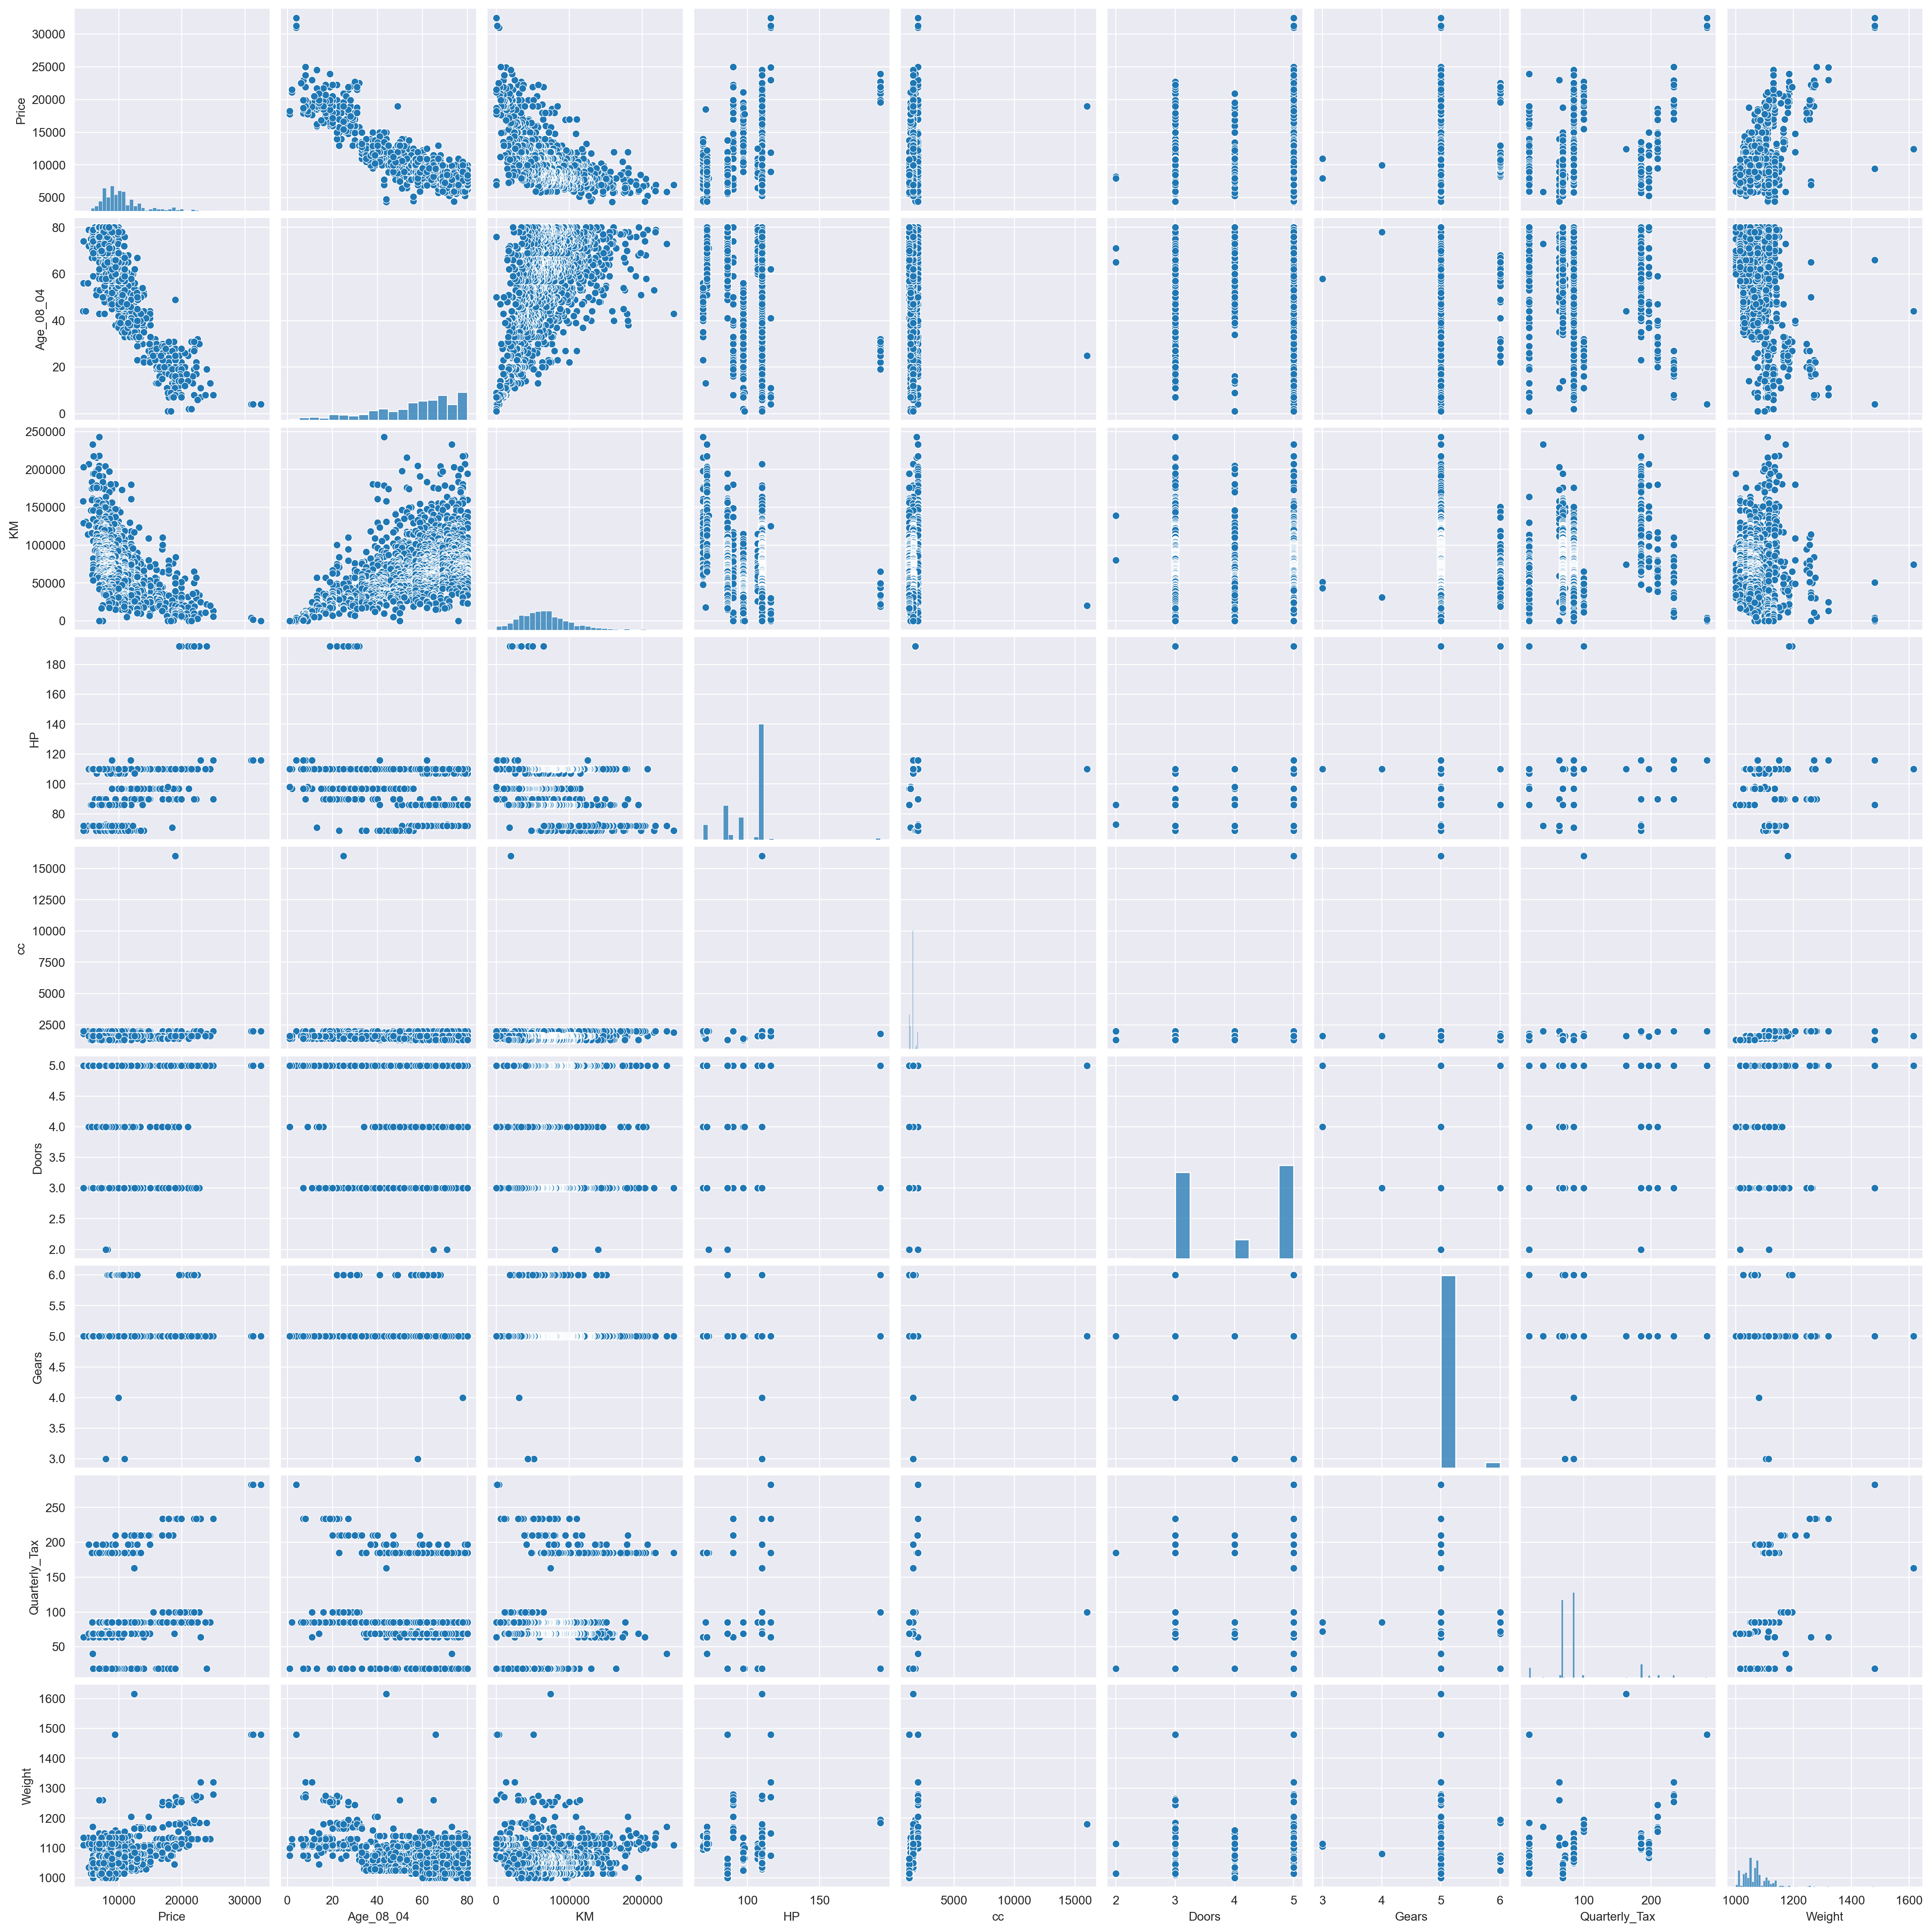

In [12]:
#Format the plot background and scatter plot for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(new)

In [13]:
#Build Model
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=new).fit()

In [14]:
#Co-efficients
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [15]:
#T and P-Values
print(model.tvalues,  model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [16]:
#r squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [17]:
ml_v=smf.ols('Price~HP',data = new).fit()
#T and P-values
print(ml_v.tvalues,   ml_v.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [18]:
ml_w=smf.ols('Price~Quarterly_Tax',data = new).fit()
print(ml_w.tvalues,  ml_w.pvalues)

Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


In [19]:
ml_wv=smf.ols('Price~HP+Quarterly_Tax',data = new).fit()
print(ml_wv.tvalues,  ml_wv.pvalues)

Intercept        -3.141023
HP               16.941891
Quarterly_Tax    13.948807
dtype: float64 Intercept        1.718015e-03
HP               7.948934e-59
Quarterly_Tax    1.462649e-41
dtype: float64


In [20]:
rsq_pr = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data = new).fit().rsquared
vif_pr = 1/(1-rsq_pr)

rsq_Ag = smf.ols('Age_08_04~Price+KM+HP+cc+Doors+Gears+Quarterly_Tax',data = new).fit().rsquared
vif_Ag = 1/(1-rsq_Ag)

rsq_KM = smf.ols('KM~Price+Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax',data = new).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Price+Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax',data = new).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Price+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax',data = new).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Do = smf.ols('Doors~Price+Age_08_04+KM+HP+cc+Gears+Quarterly_Tax',data = new).fit().rsquared
vif_Do = 1/(1-rsq_Do)

rsq_Ge = smf.ols('Gears~Price+Age_08_04+KM+HP+cc+Doors+Quarterly_Tax',data = new).fit().rsquared
vif_Ge = 1/(1-rsq_Ge)

rsq_Qs = smf.ols('Quarterly_Tax~Price+Age_08_04+KM+HP+cc+Doors+Gears',data = new).fit().rsquared
vif_Qs = 1/(1-rsq_Qs)

rsq_Wt = smf.ols('Weight~Price+Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax',data = new).fit().rsquared
vif_Wt = 1/(1-rsq_Wt)


#storing vif values in a data frame

S1 = {'Variables':['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_pr,vif_Ag,vif_KM,vif_HP,vif_cc,vif_Do,vif_Ge,vif_Qs,vif_Wt]}
vif_frame = pd.DataFrame(S1)
vif_frame

Variables       VIF
0          Price  6.237835
1      Age_08_04  4.699164
2             KM  2.023329
3             HP  1.521247
4             cc  1.135373
5          Doors  1.094346
6          Gears  1.105129
7  Quarterly_Tax  1.720501
8         Weight  2.884888

Text(0.5, 1.0, 'Normal Q-Q plot of residuals')

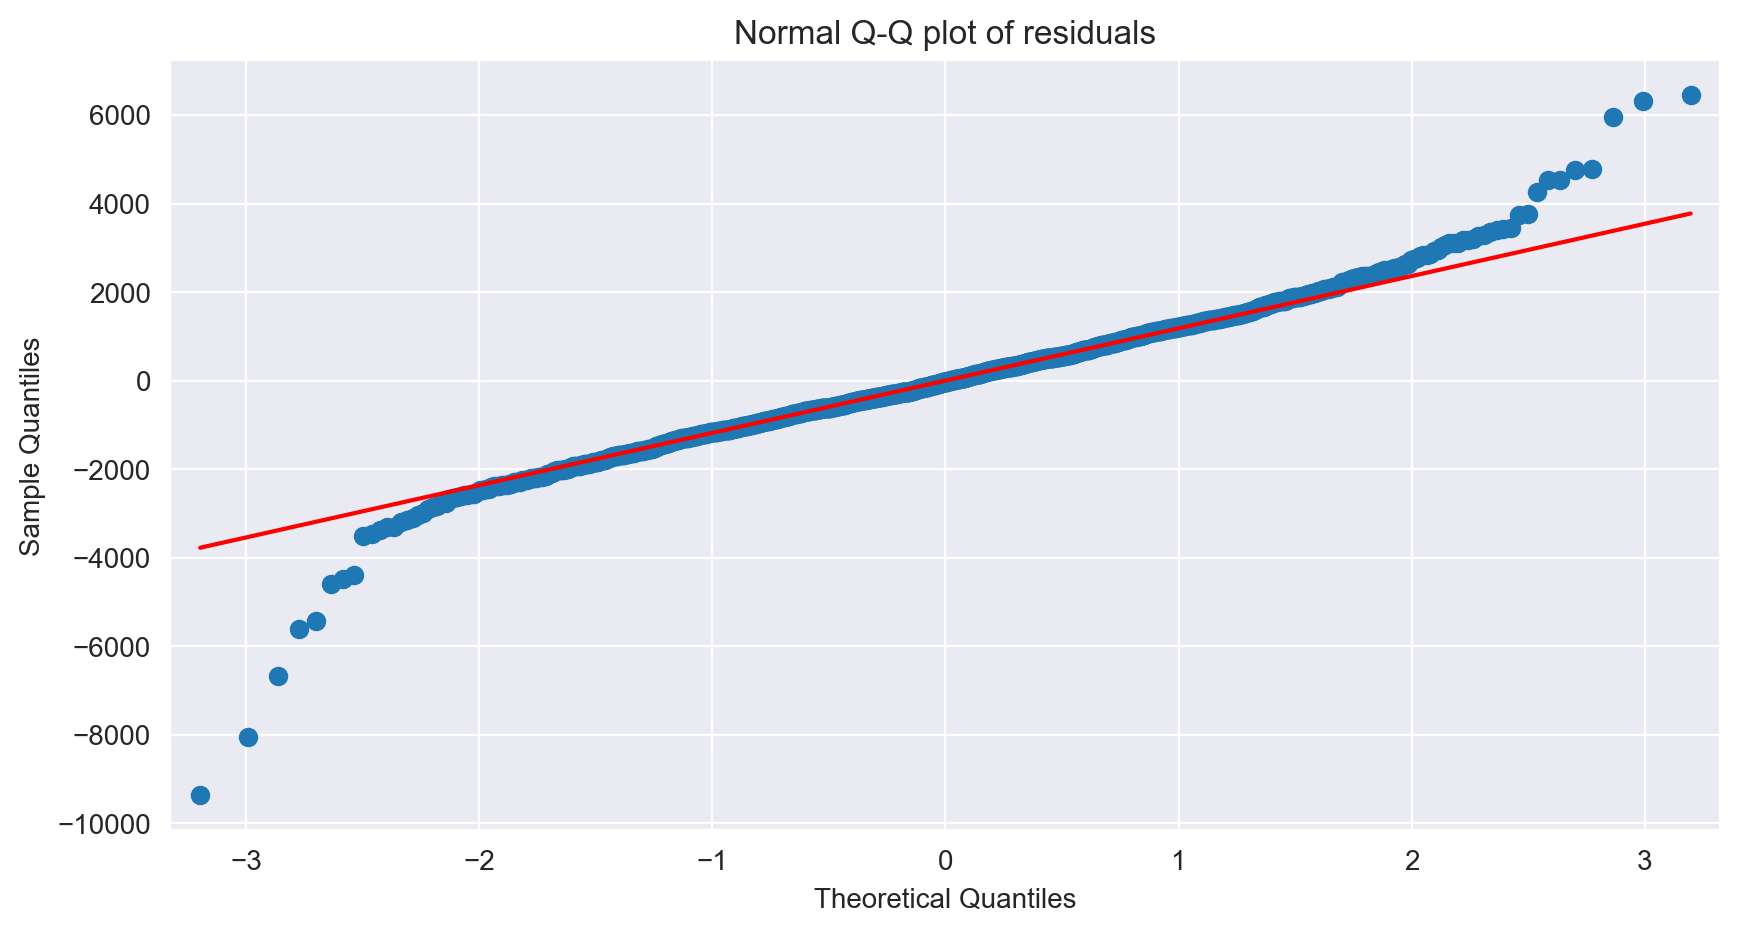

In [21]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')

In [22]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [23]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized residual Values')

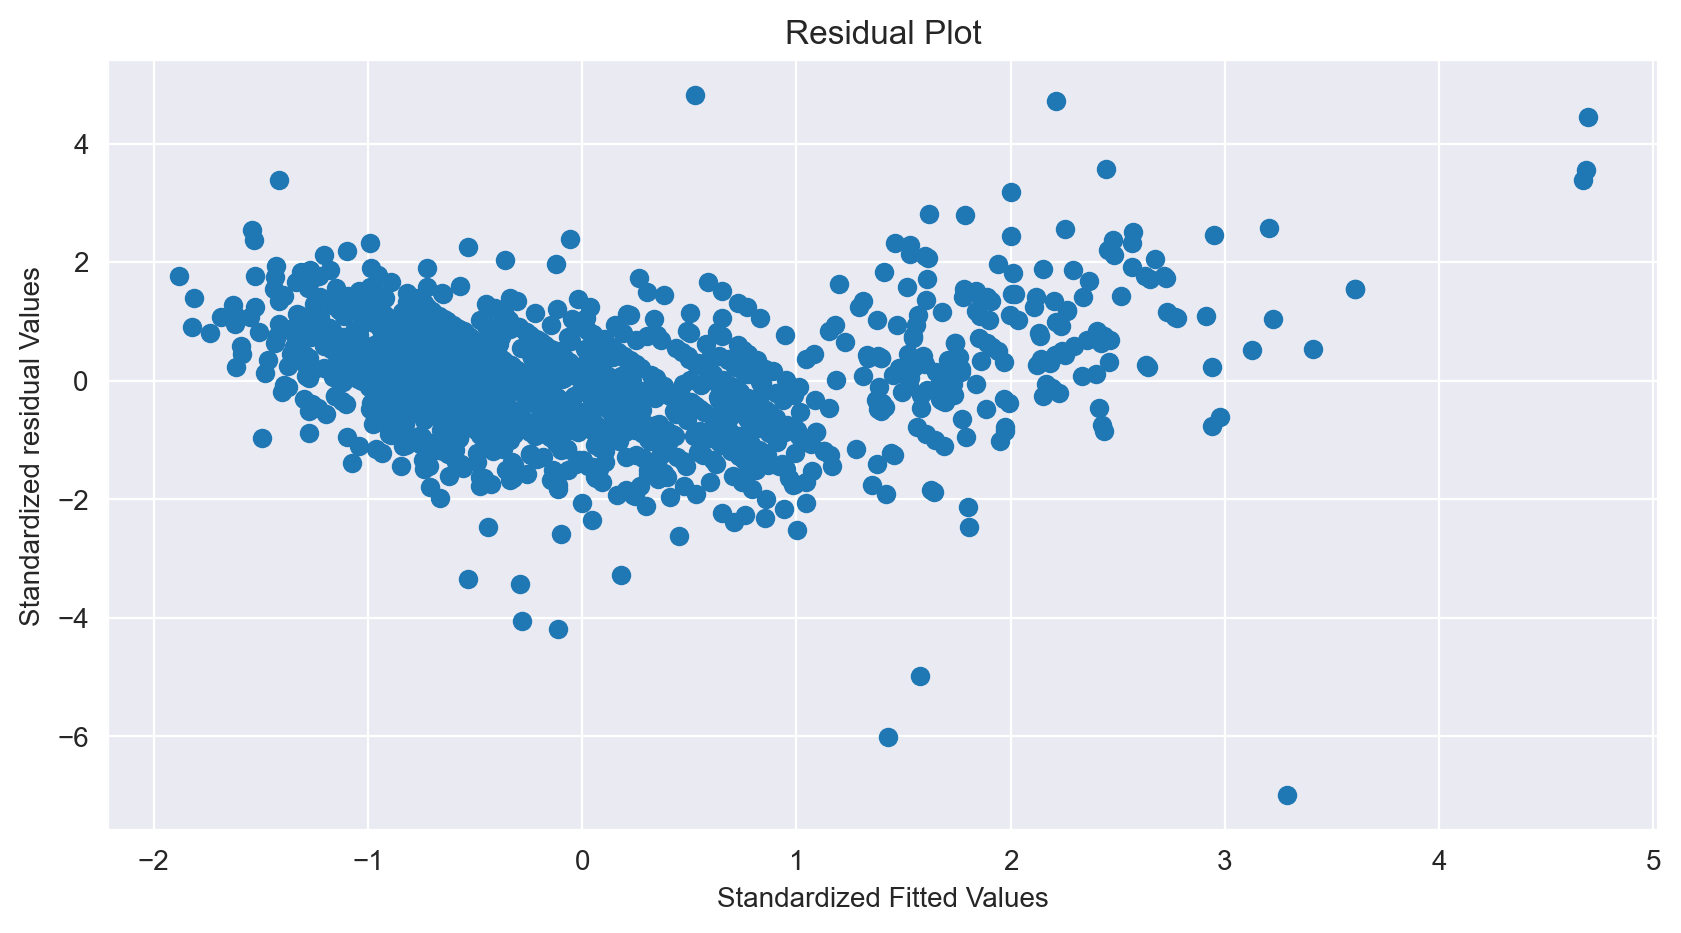

In [24]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized residual Values')

eval_env: 1


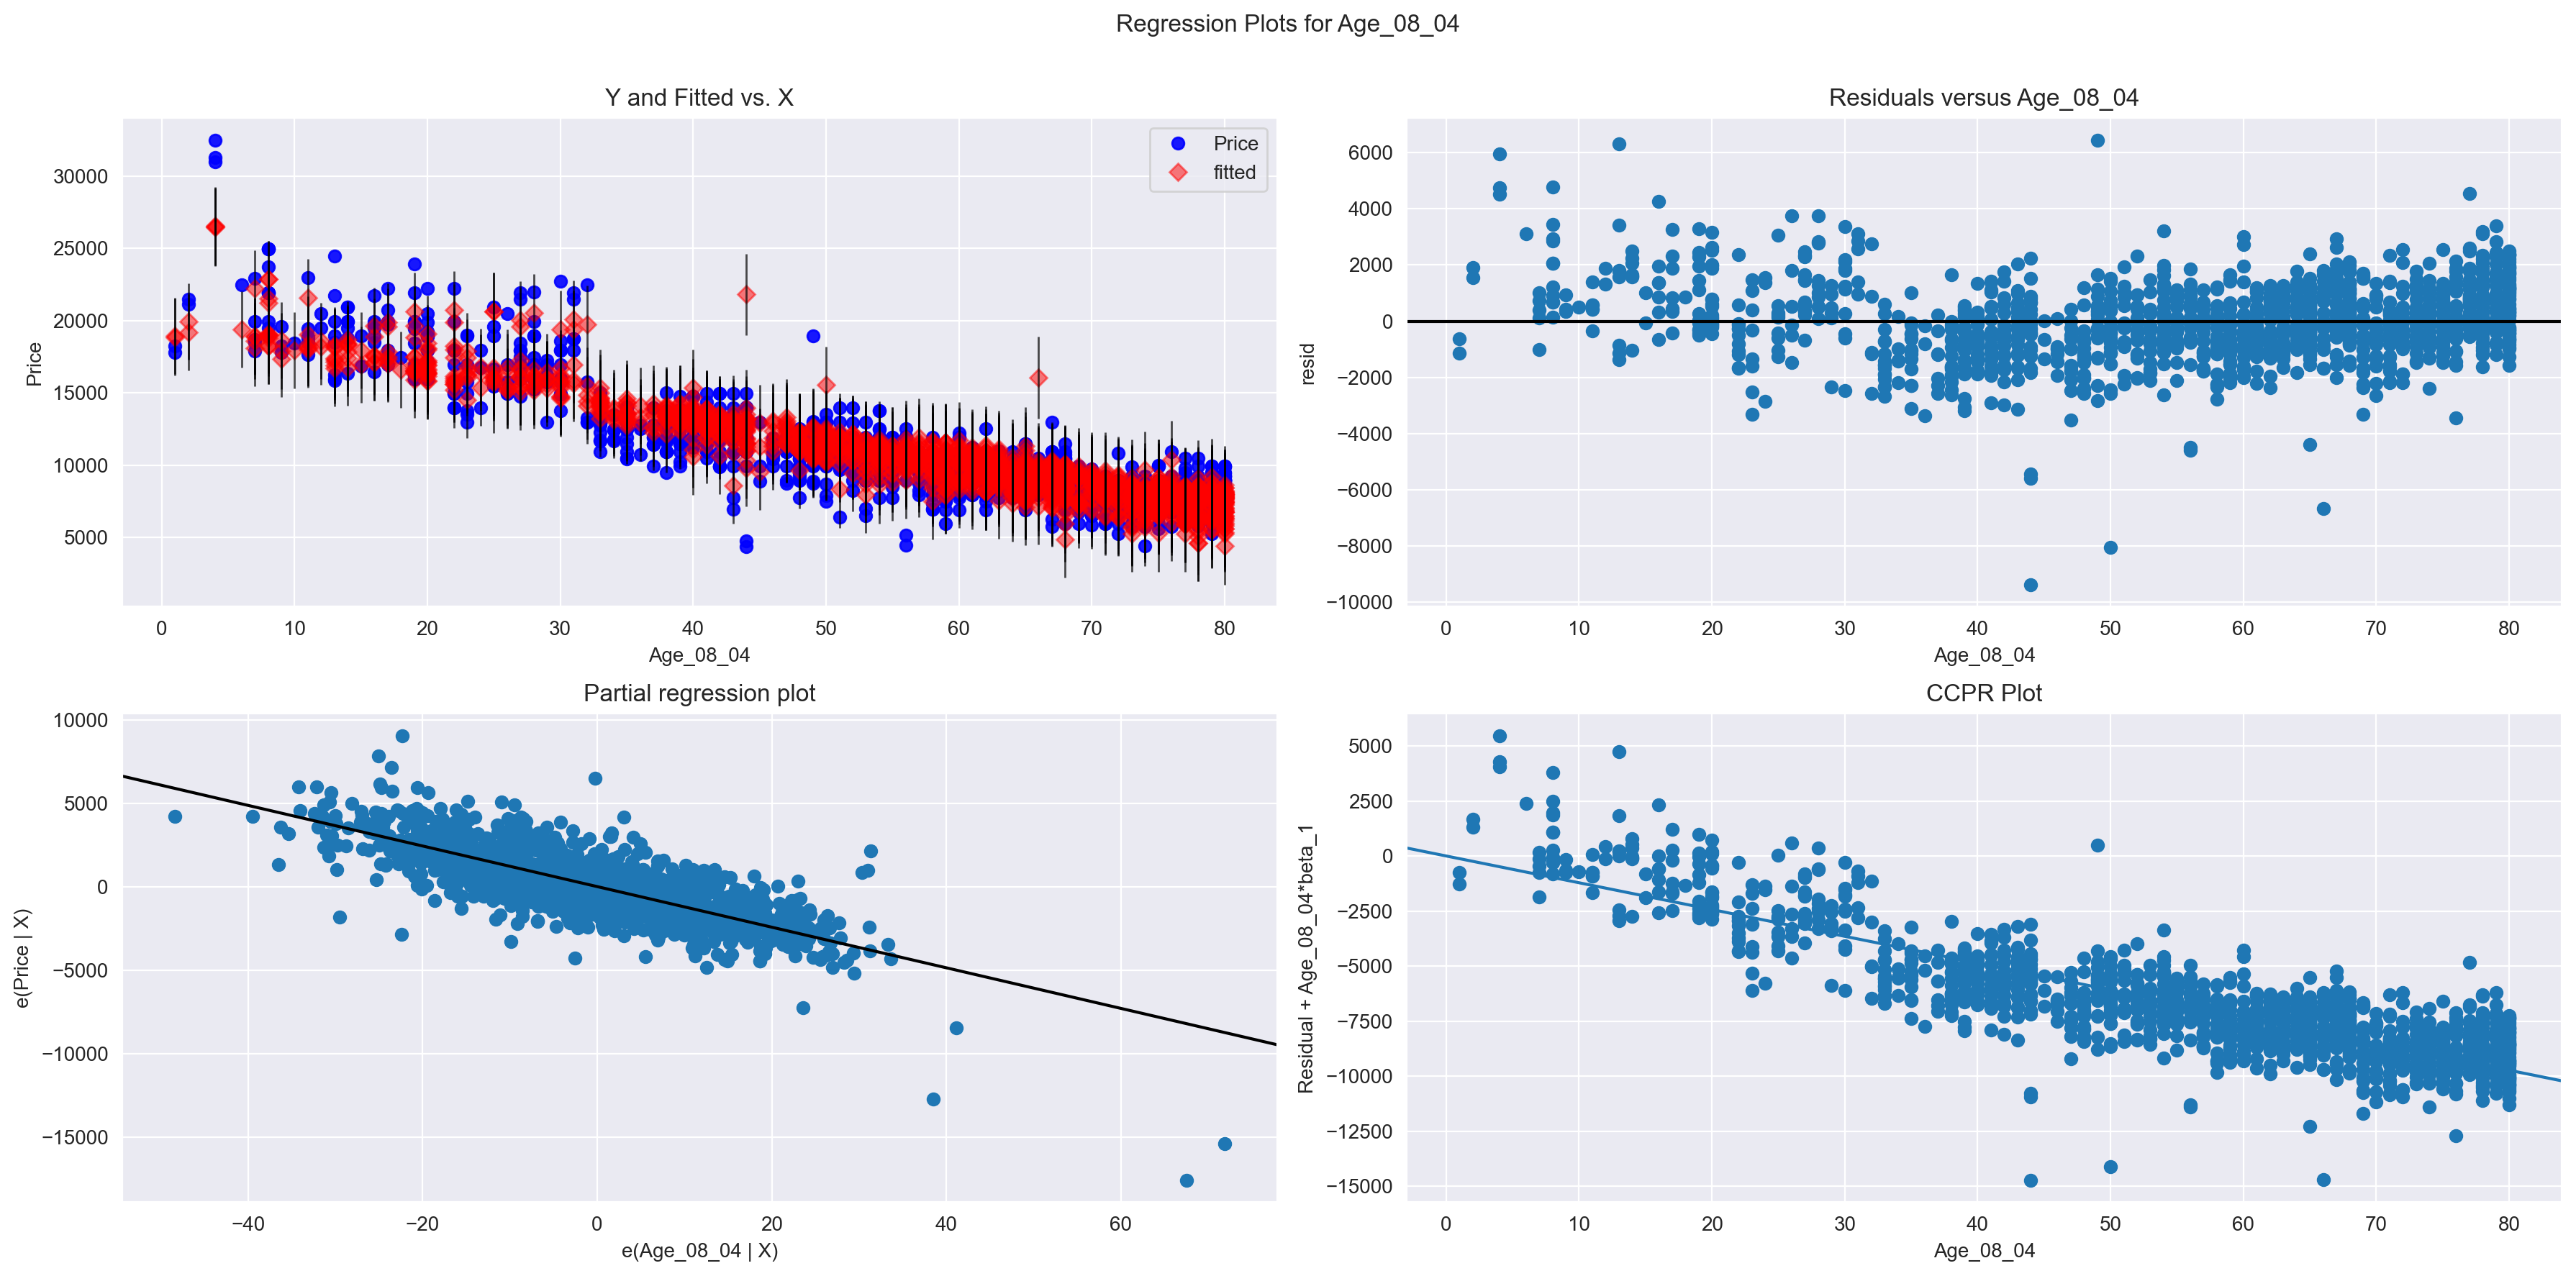

In [25]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'Age_08_04', fig=fig)

eval_env: 1


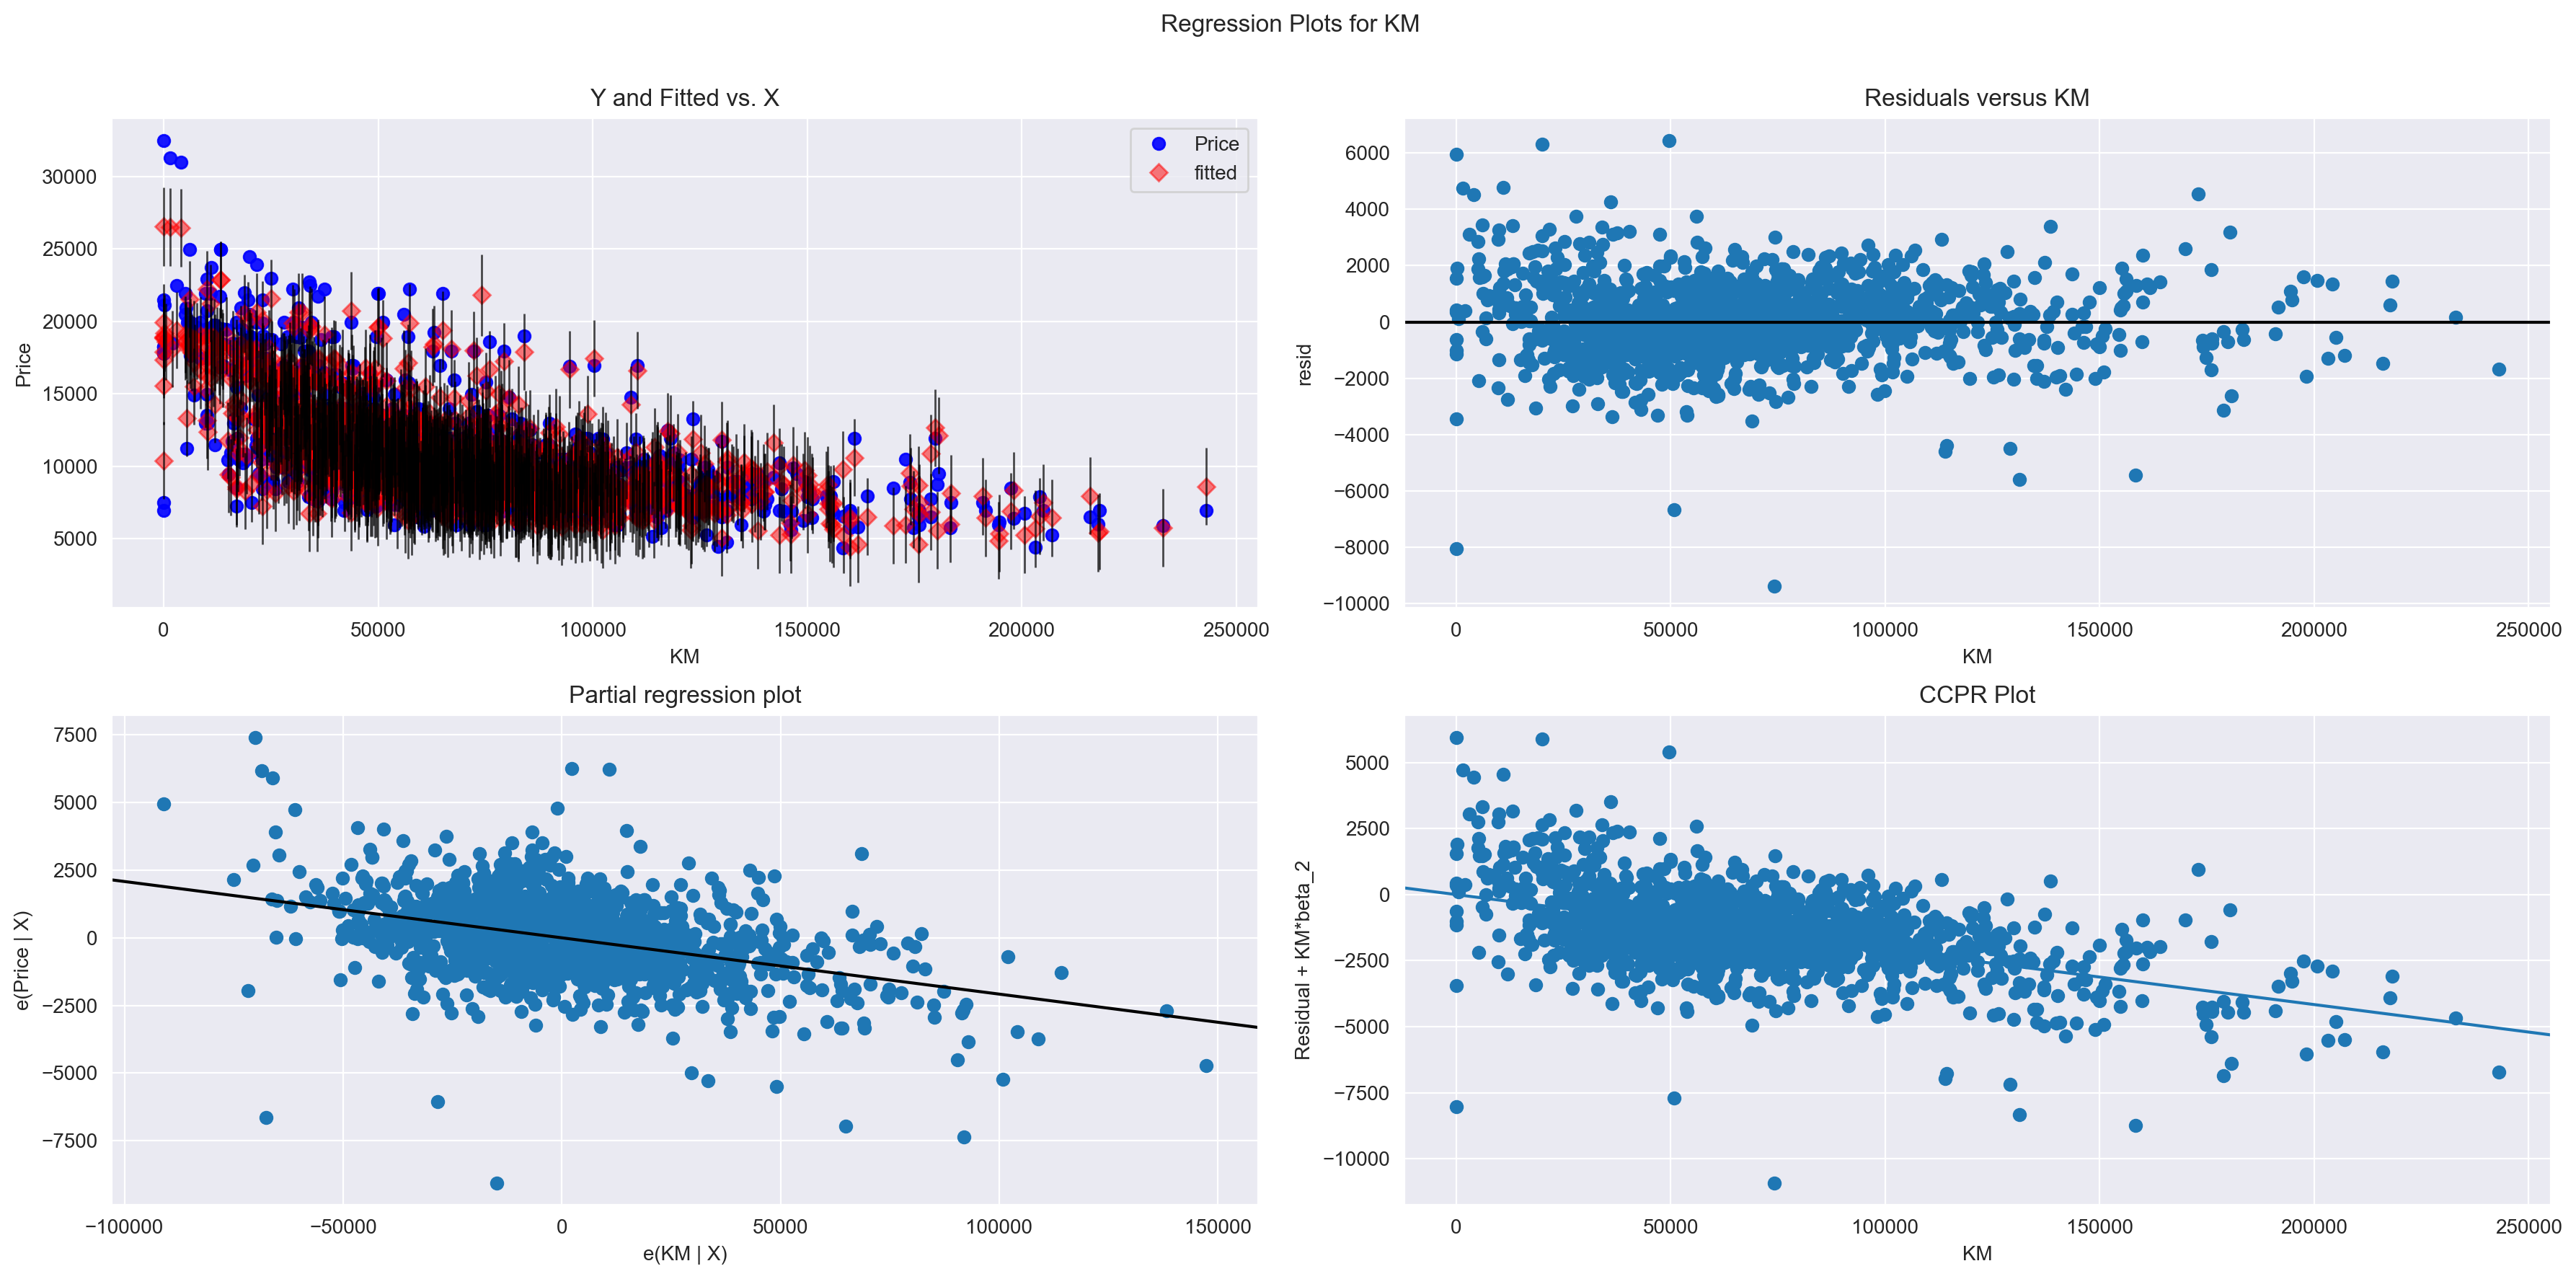

In [26]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'KM', fig=fig)

eval_env: 1


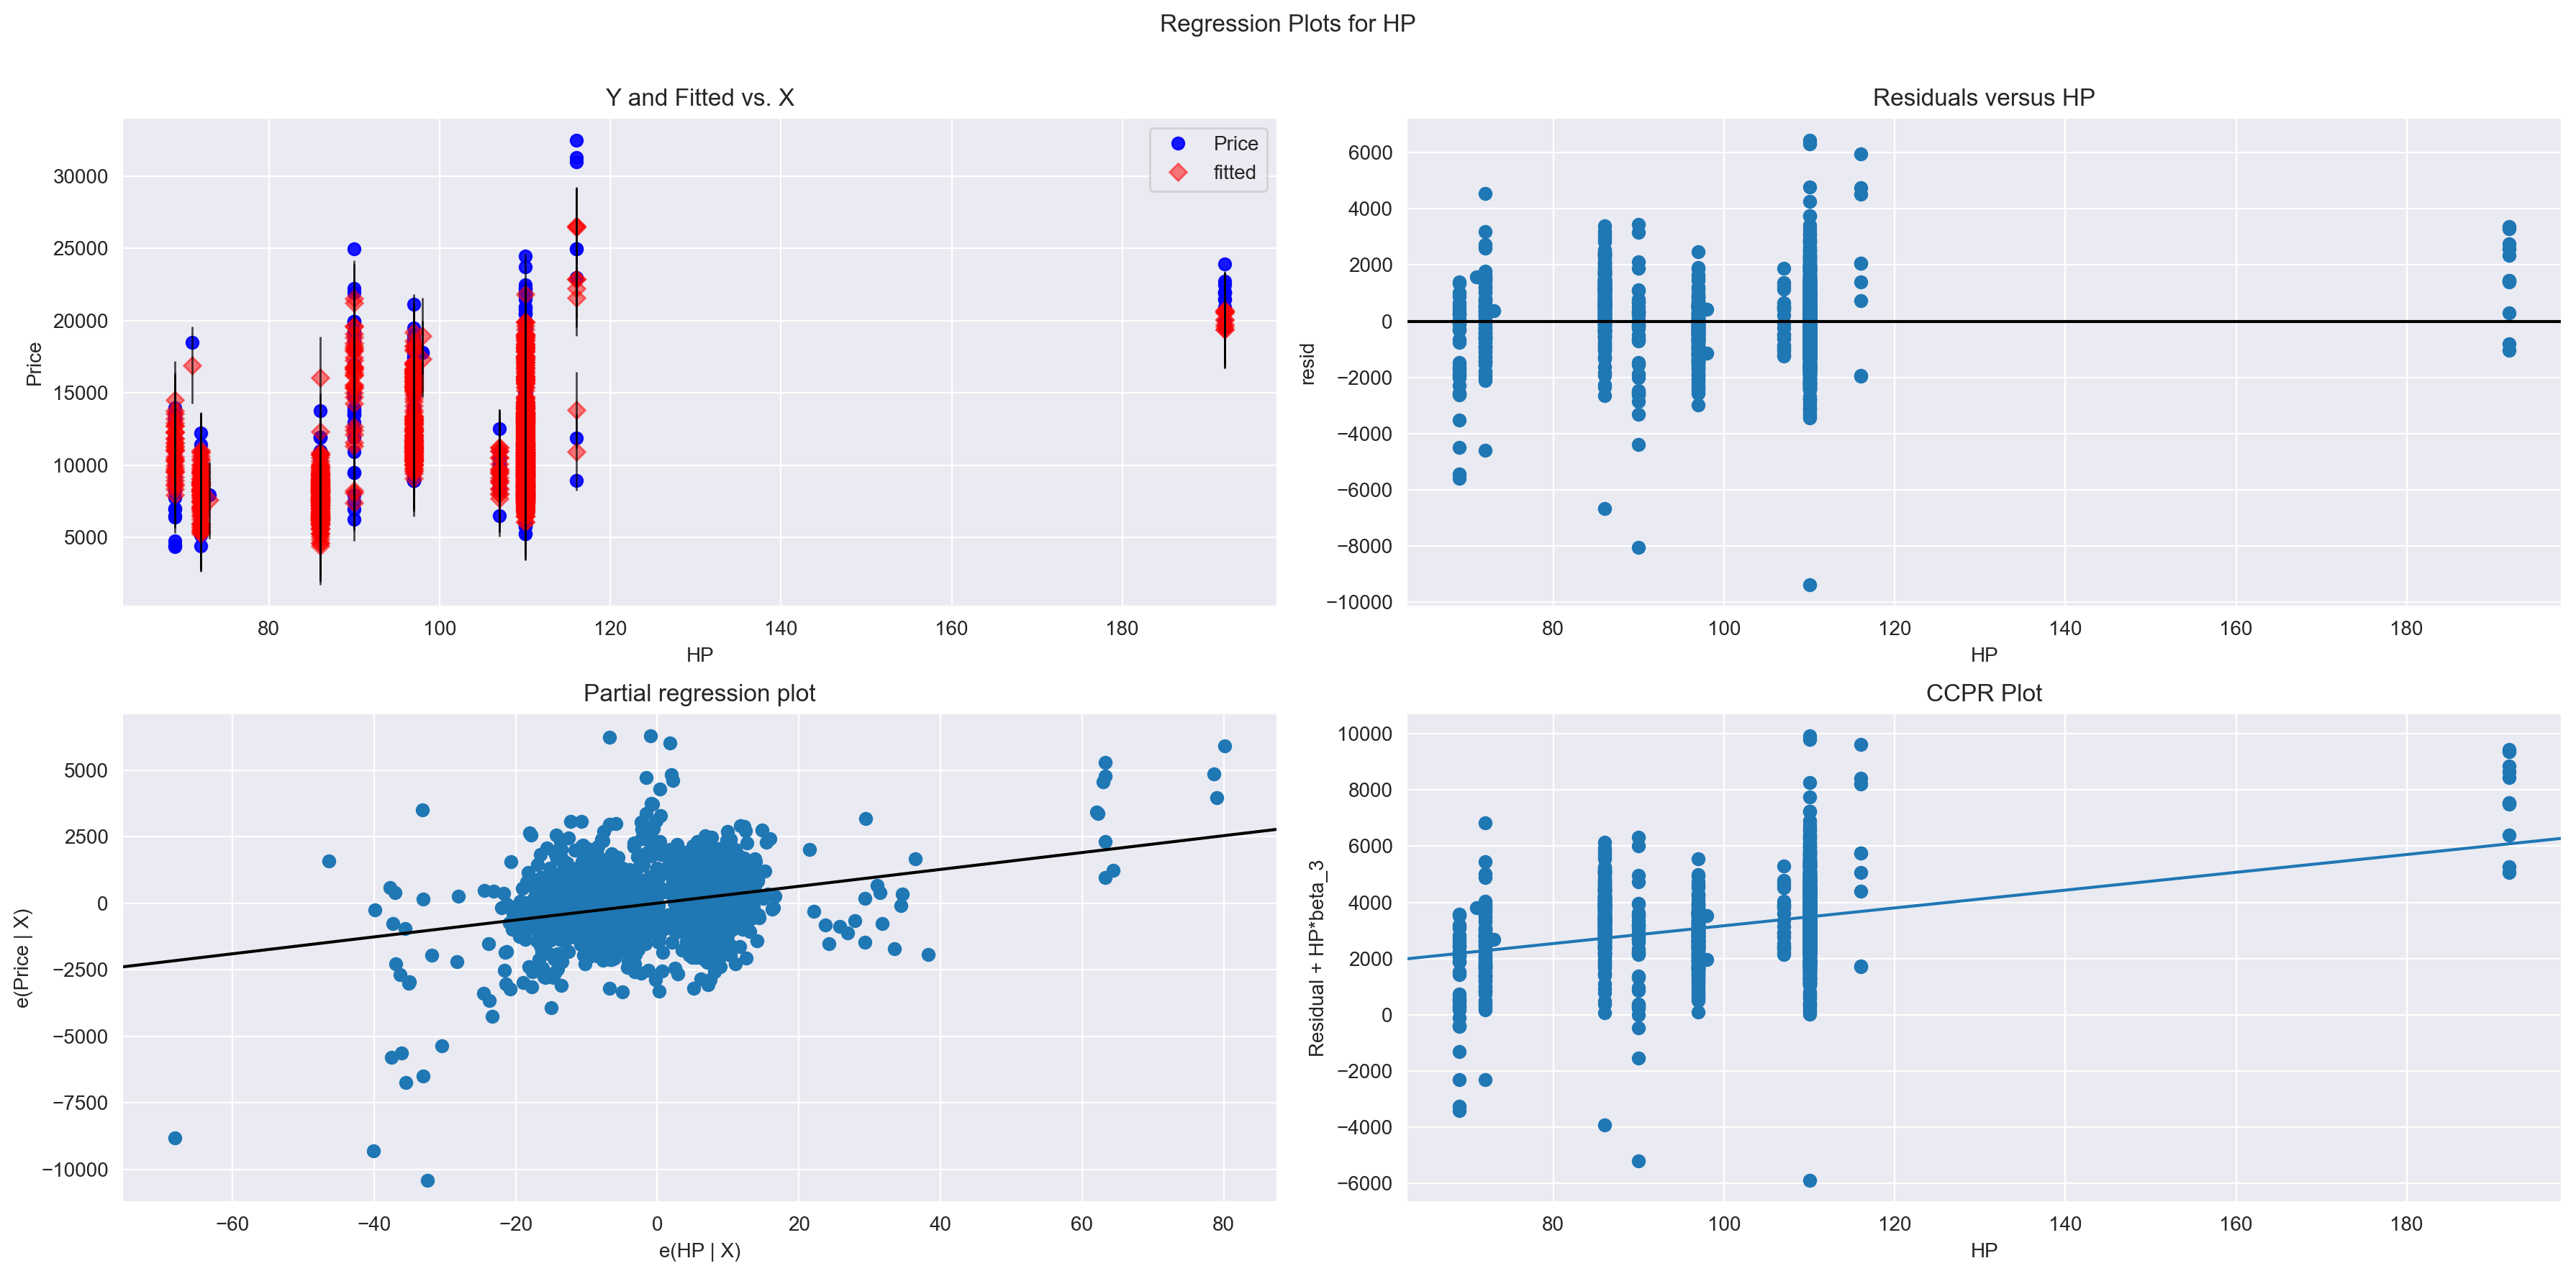

In [27]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)

eval_env: 1


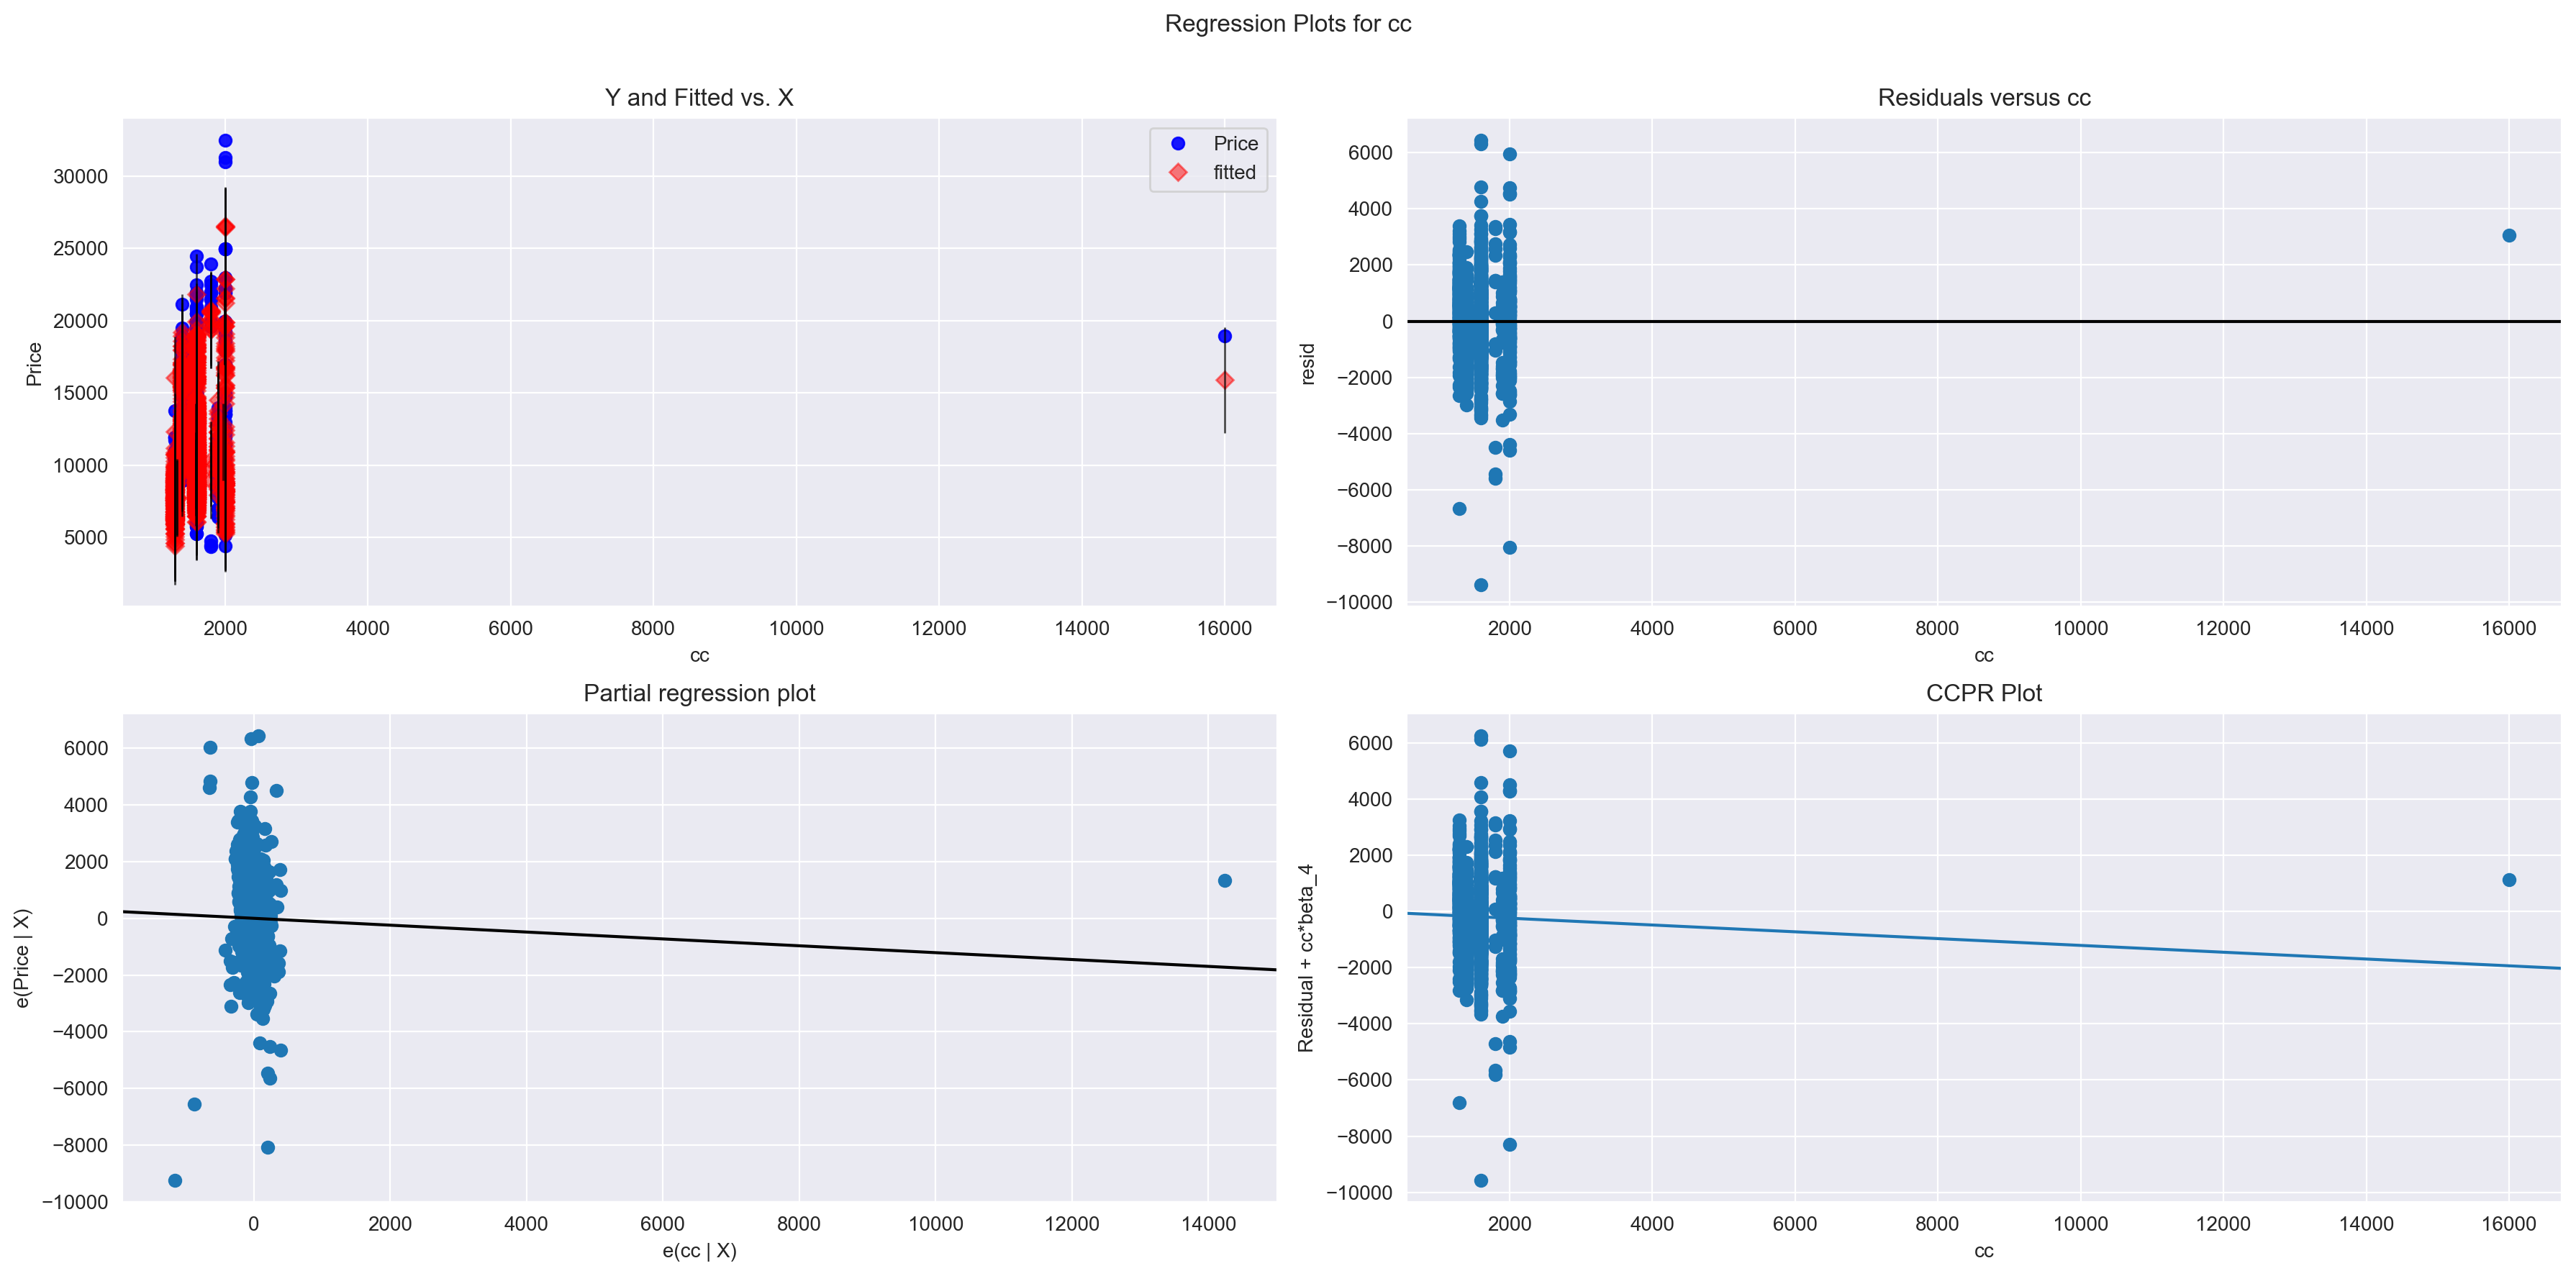

In [28]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'cc', fig=fig)

eval_env: 1


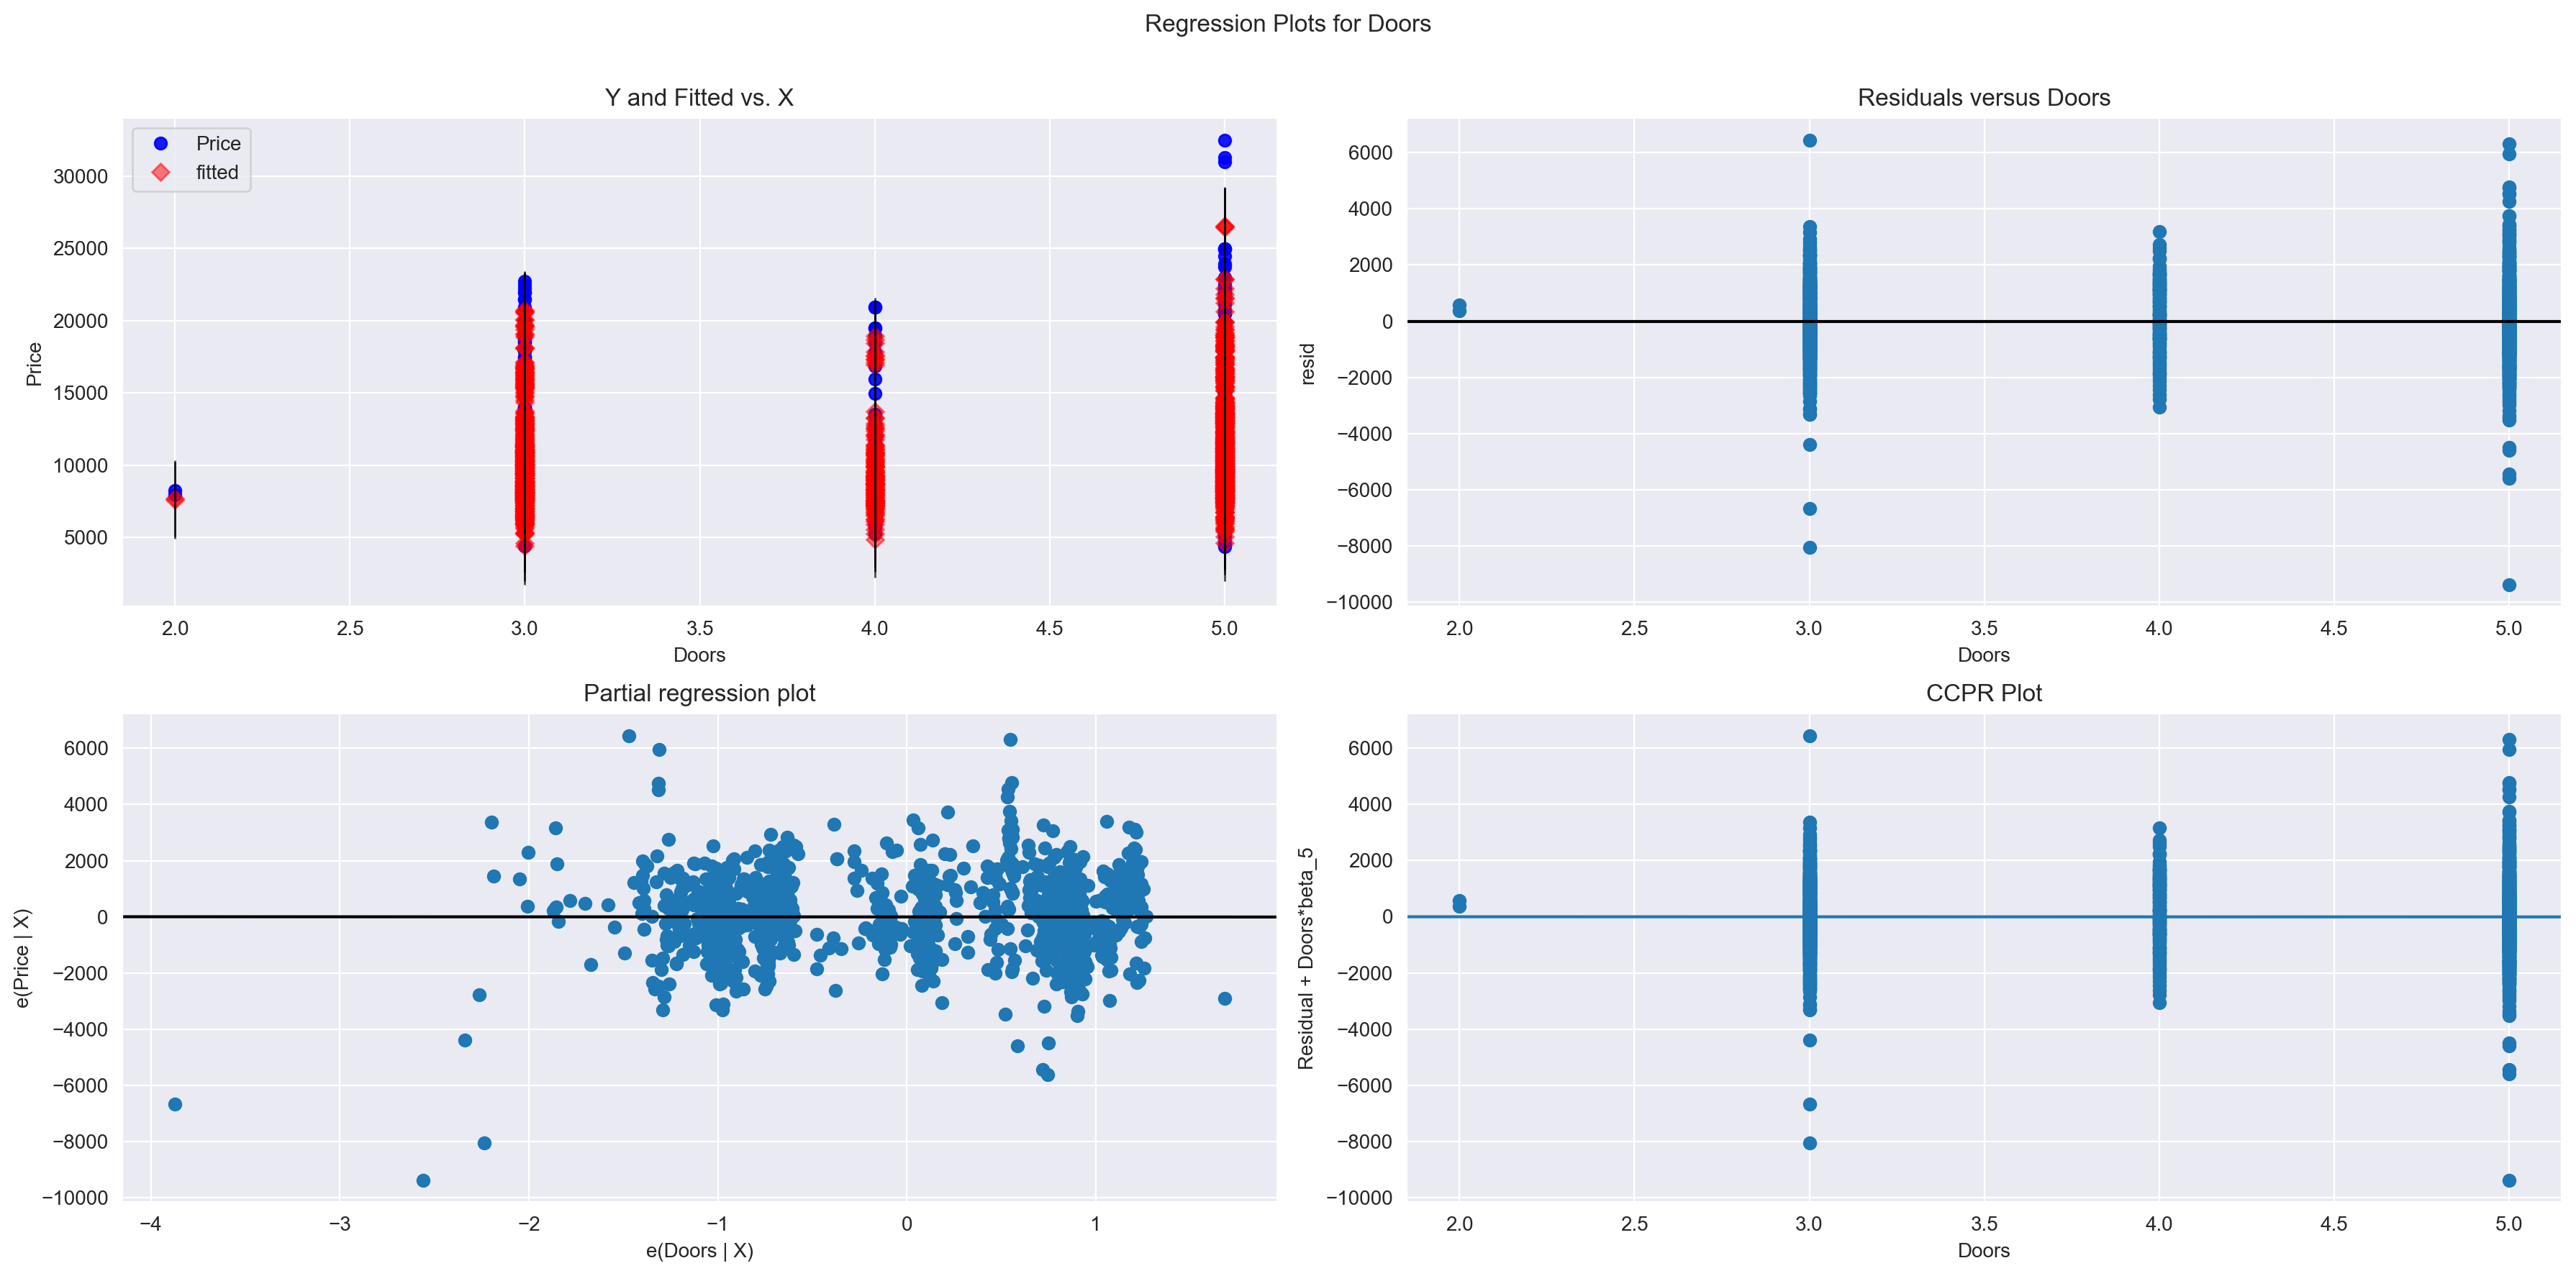

In [29]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)

eval_env: 1


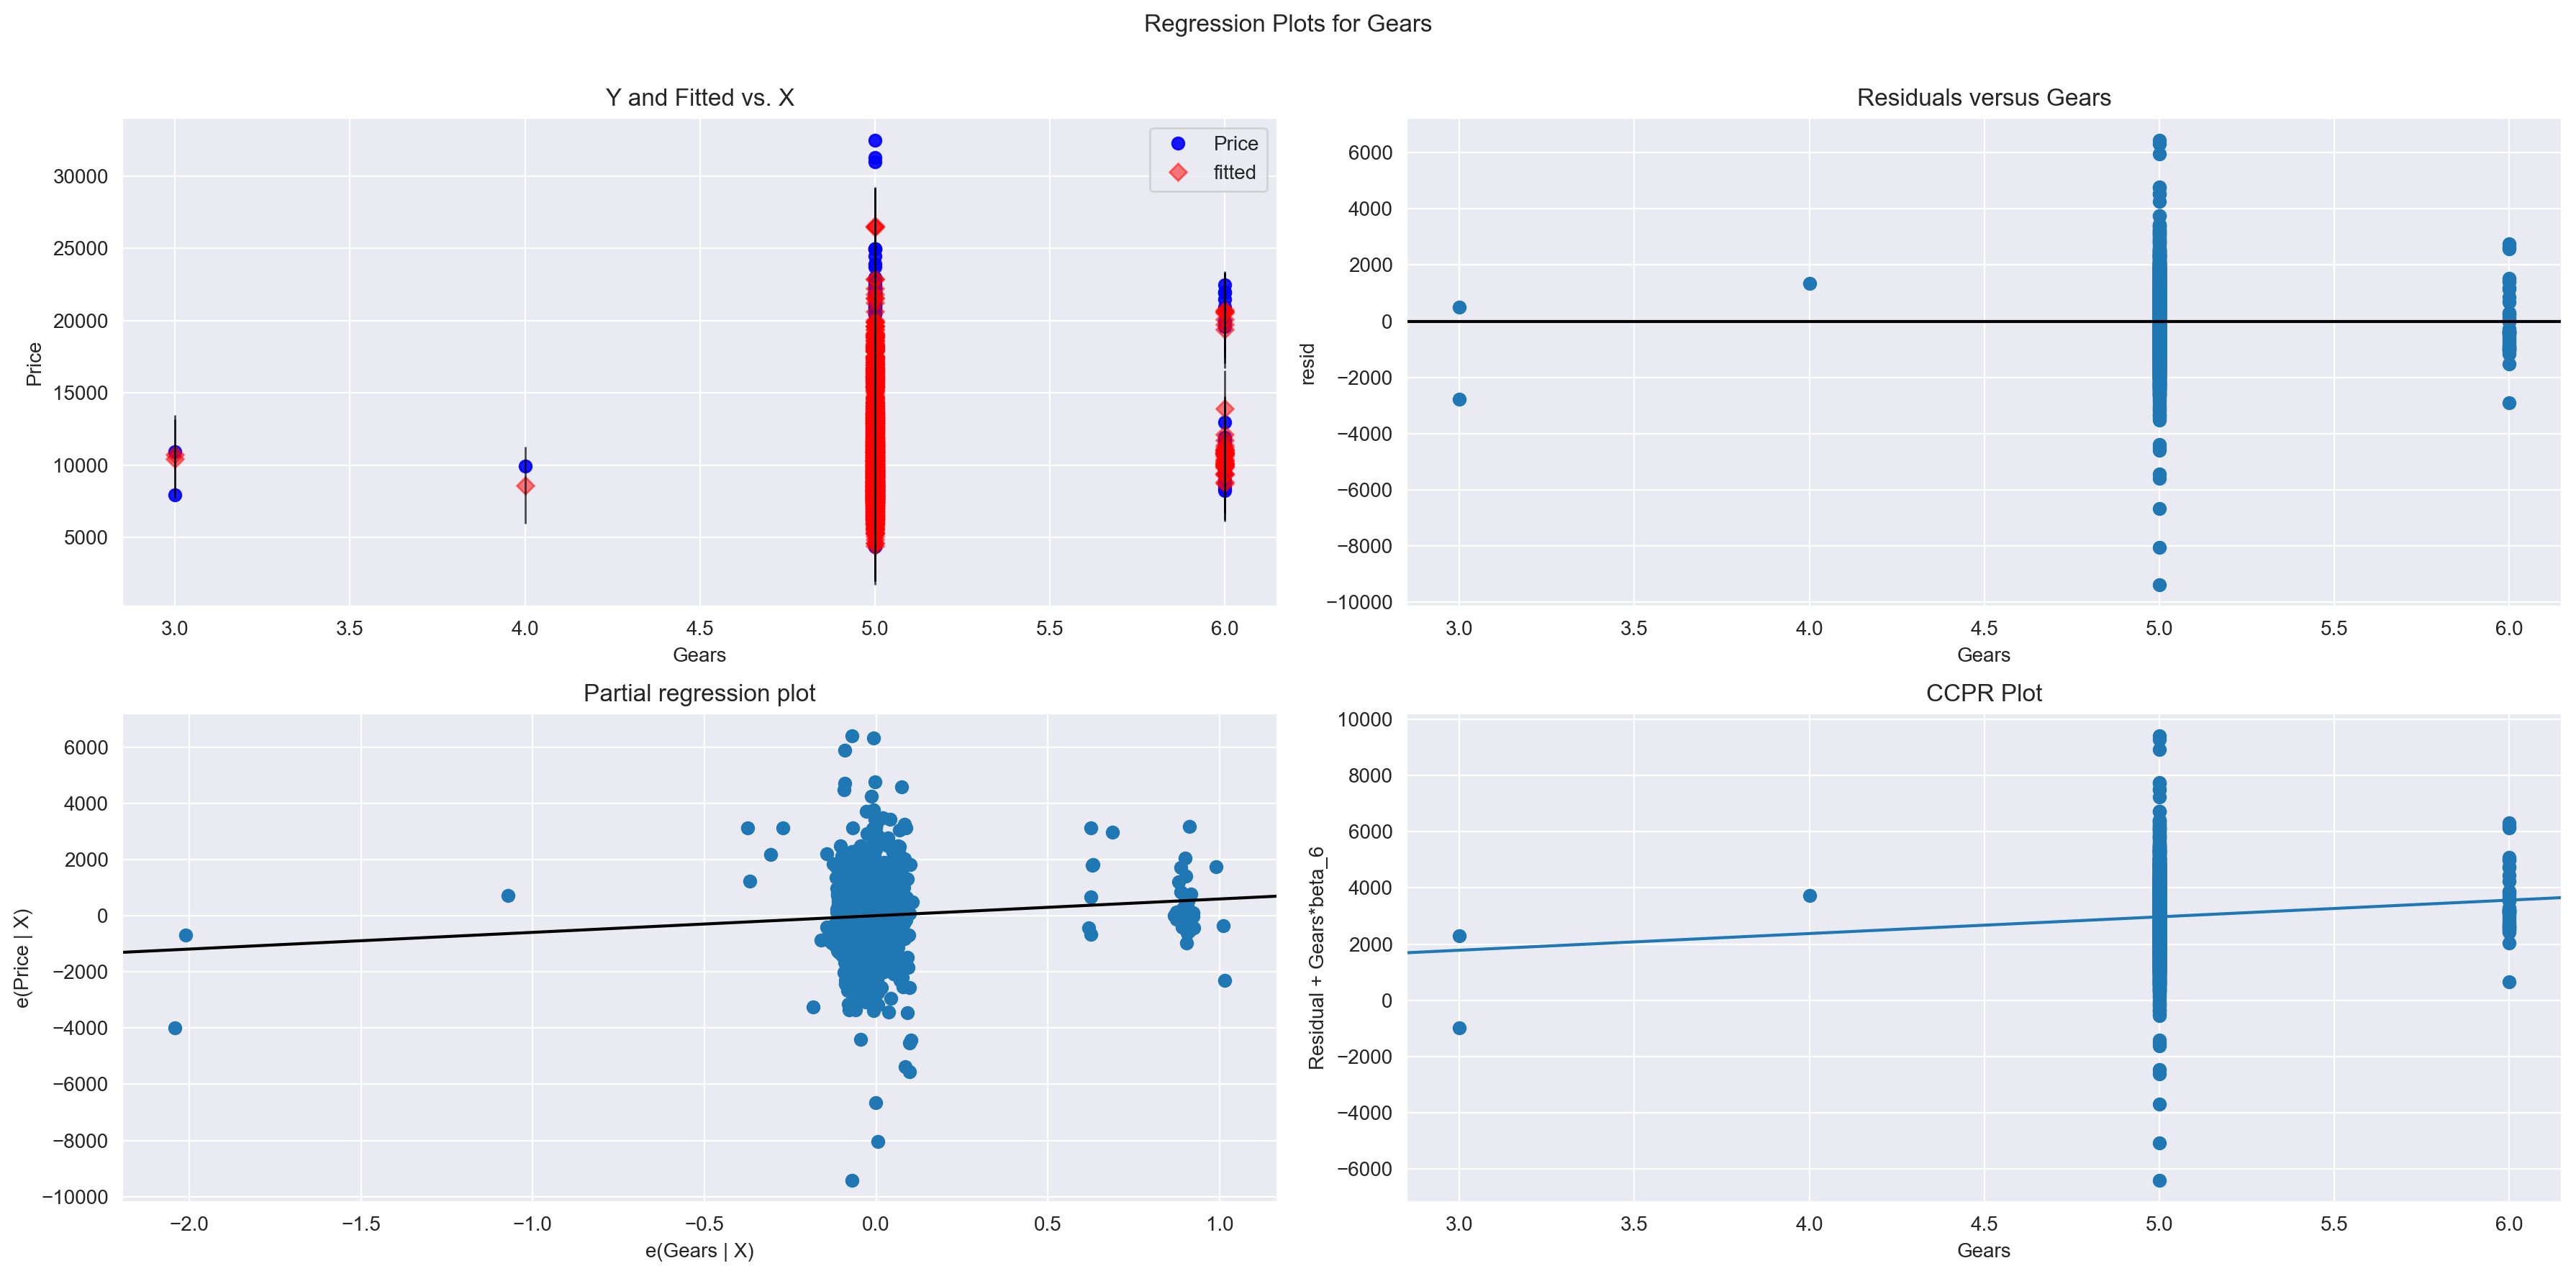

In [30]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)

eval_env: 1


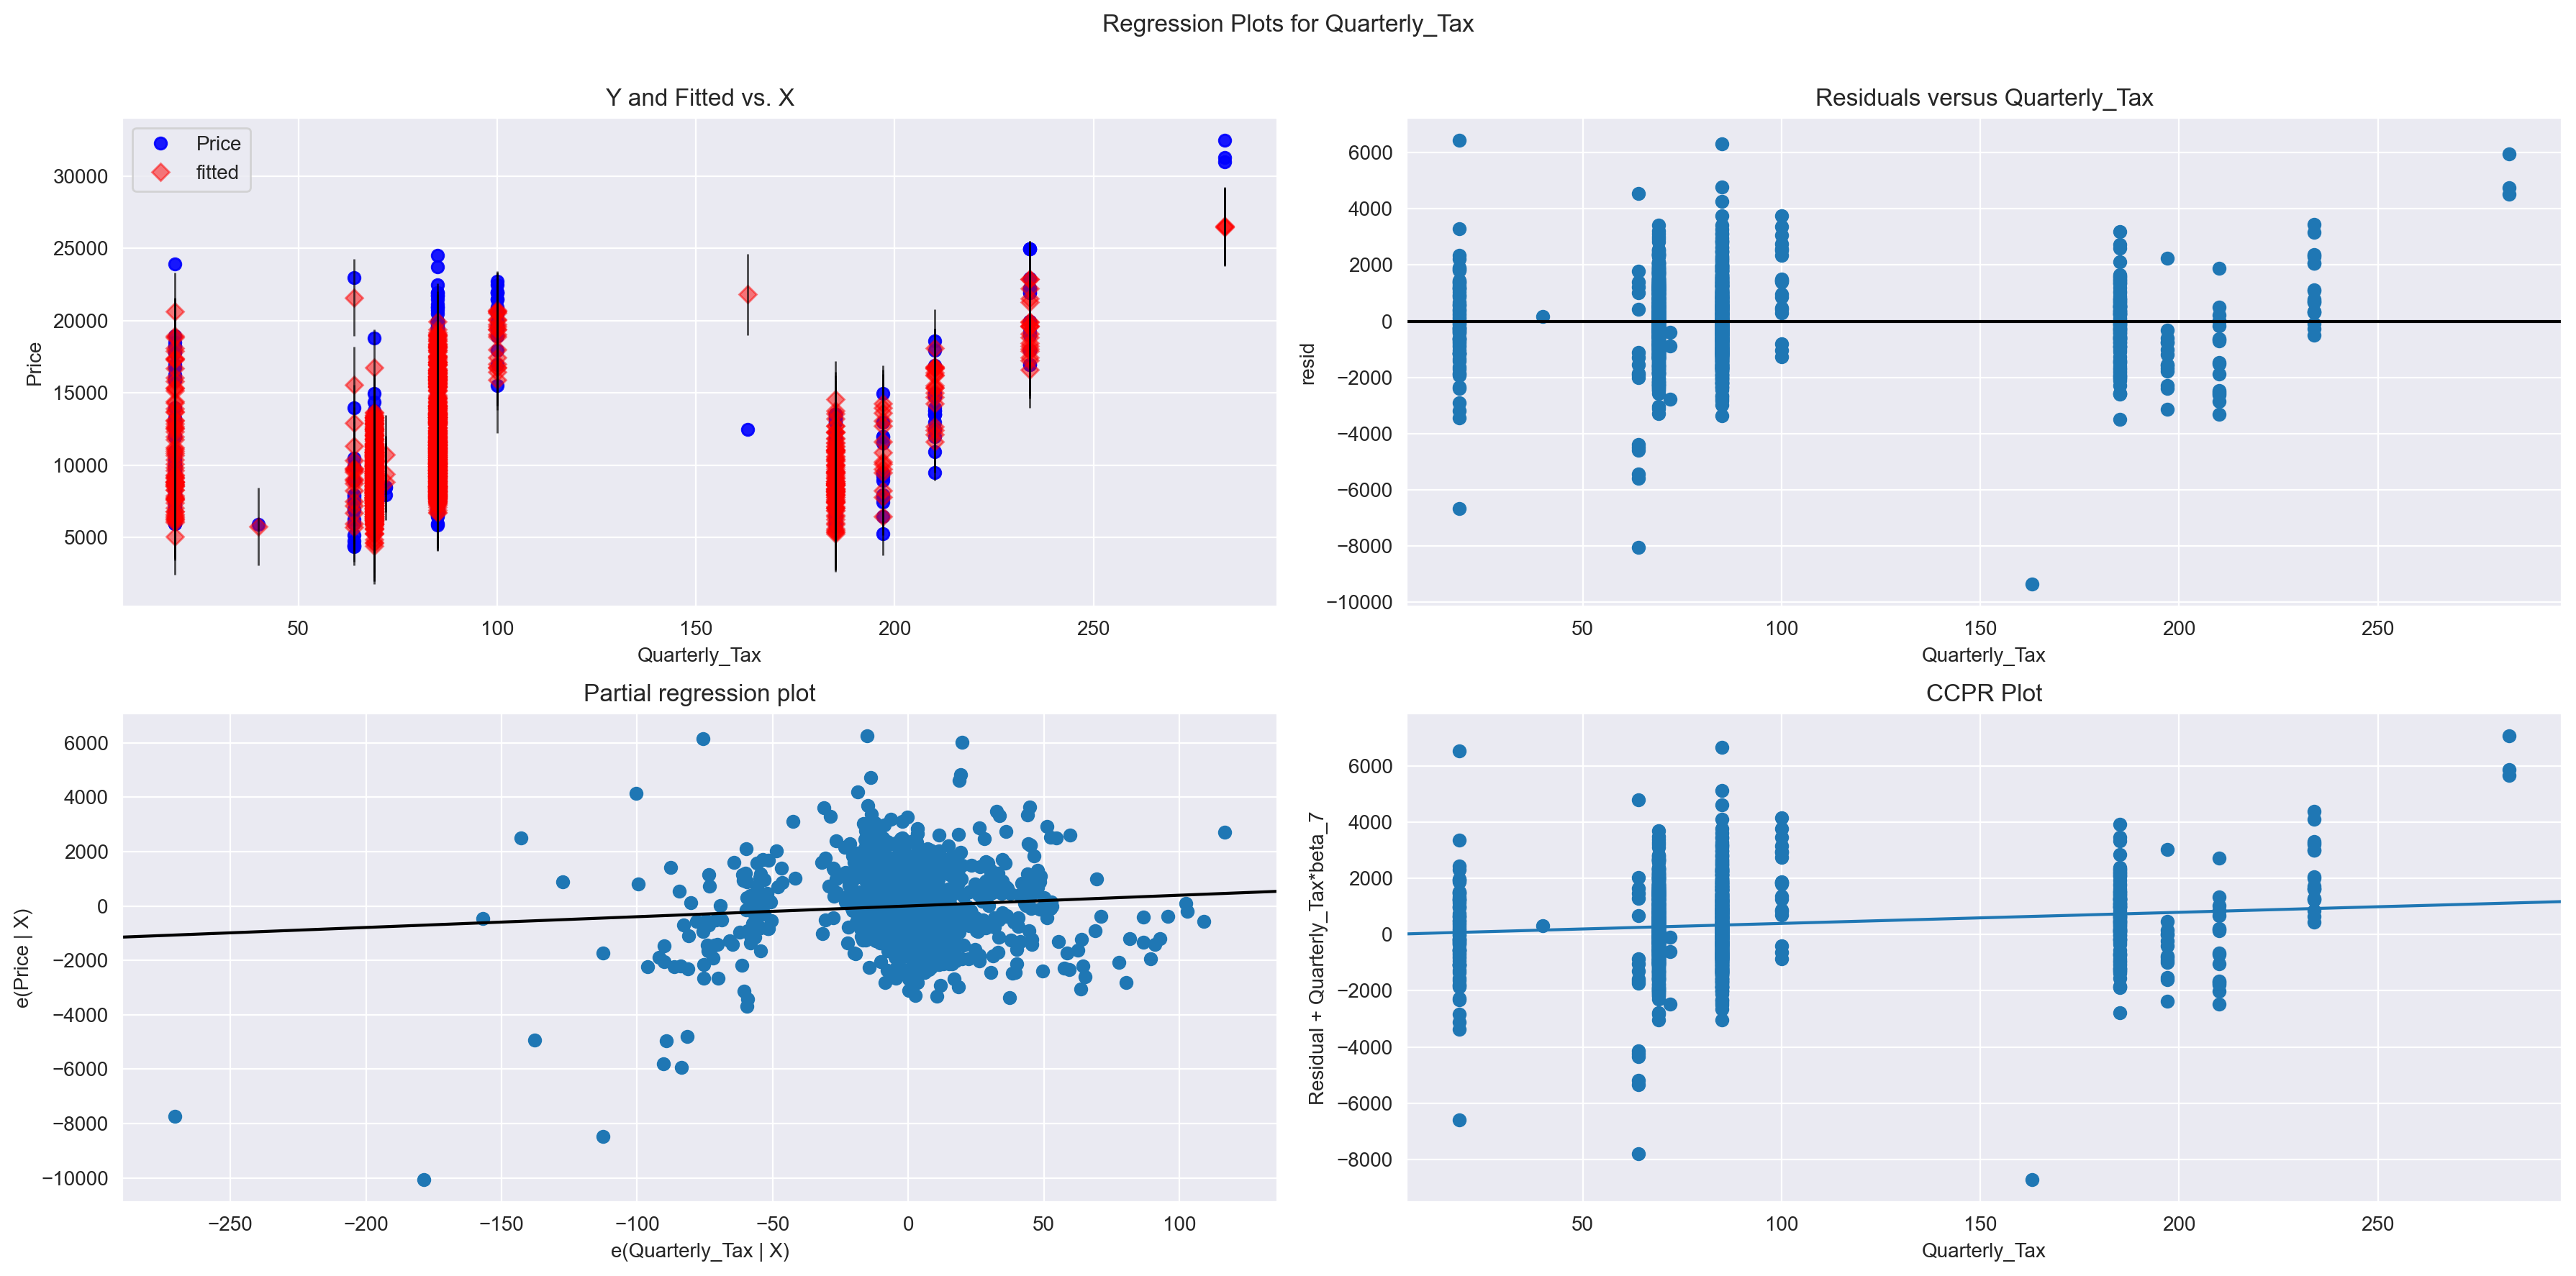

In [31]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'Quarterly_Tax', fig=fig)

eval_env: 1


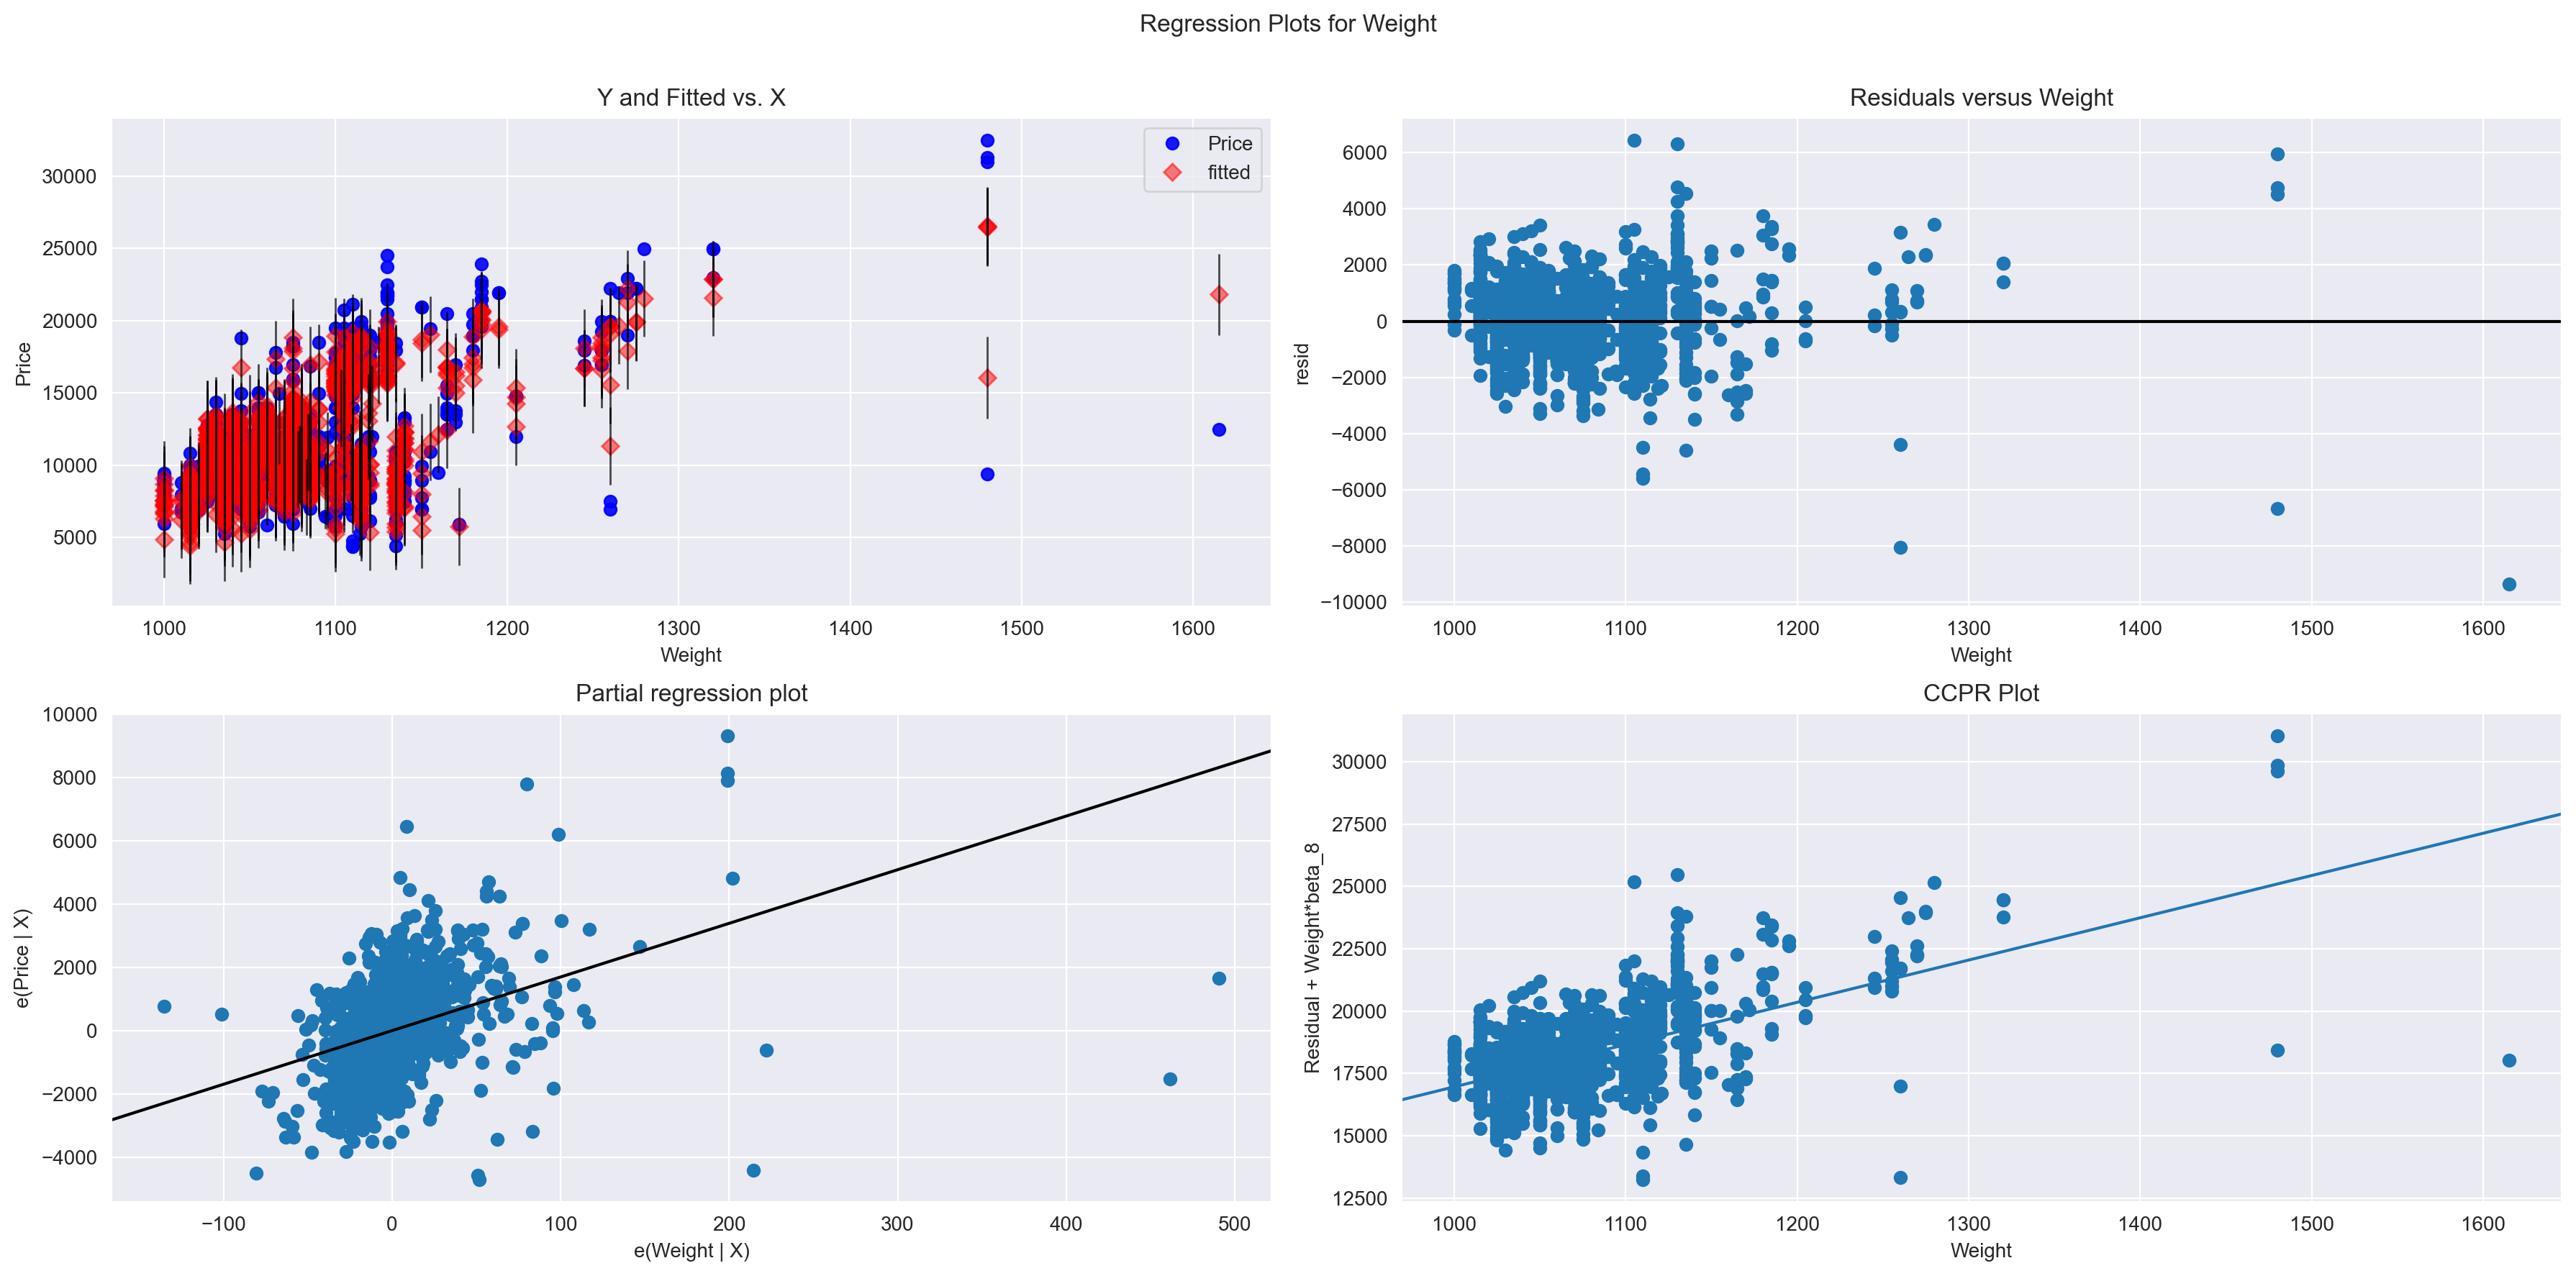

In [32]:
fig = plt.figure(figsize=(18,9))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)

In [33]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

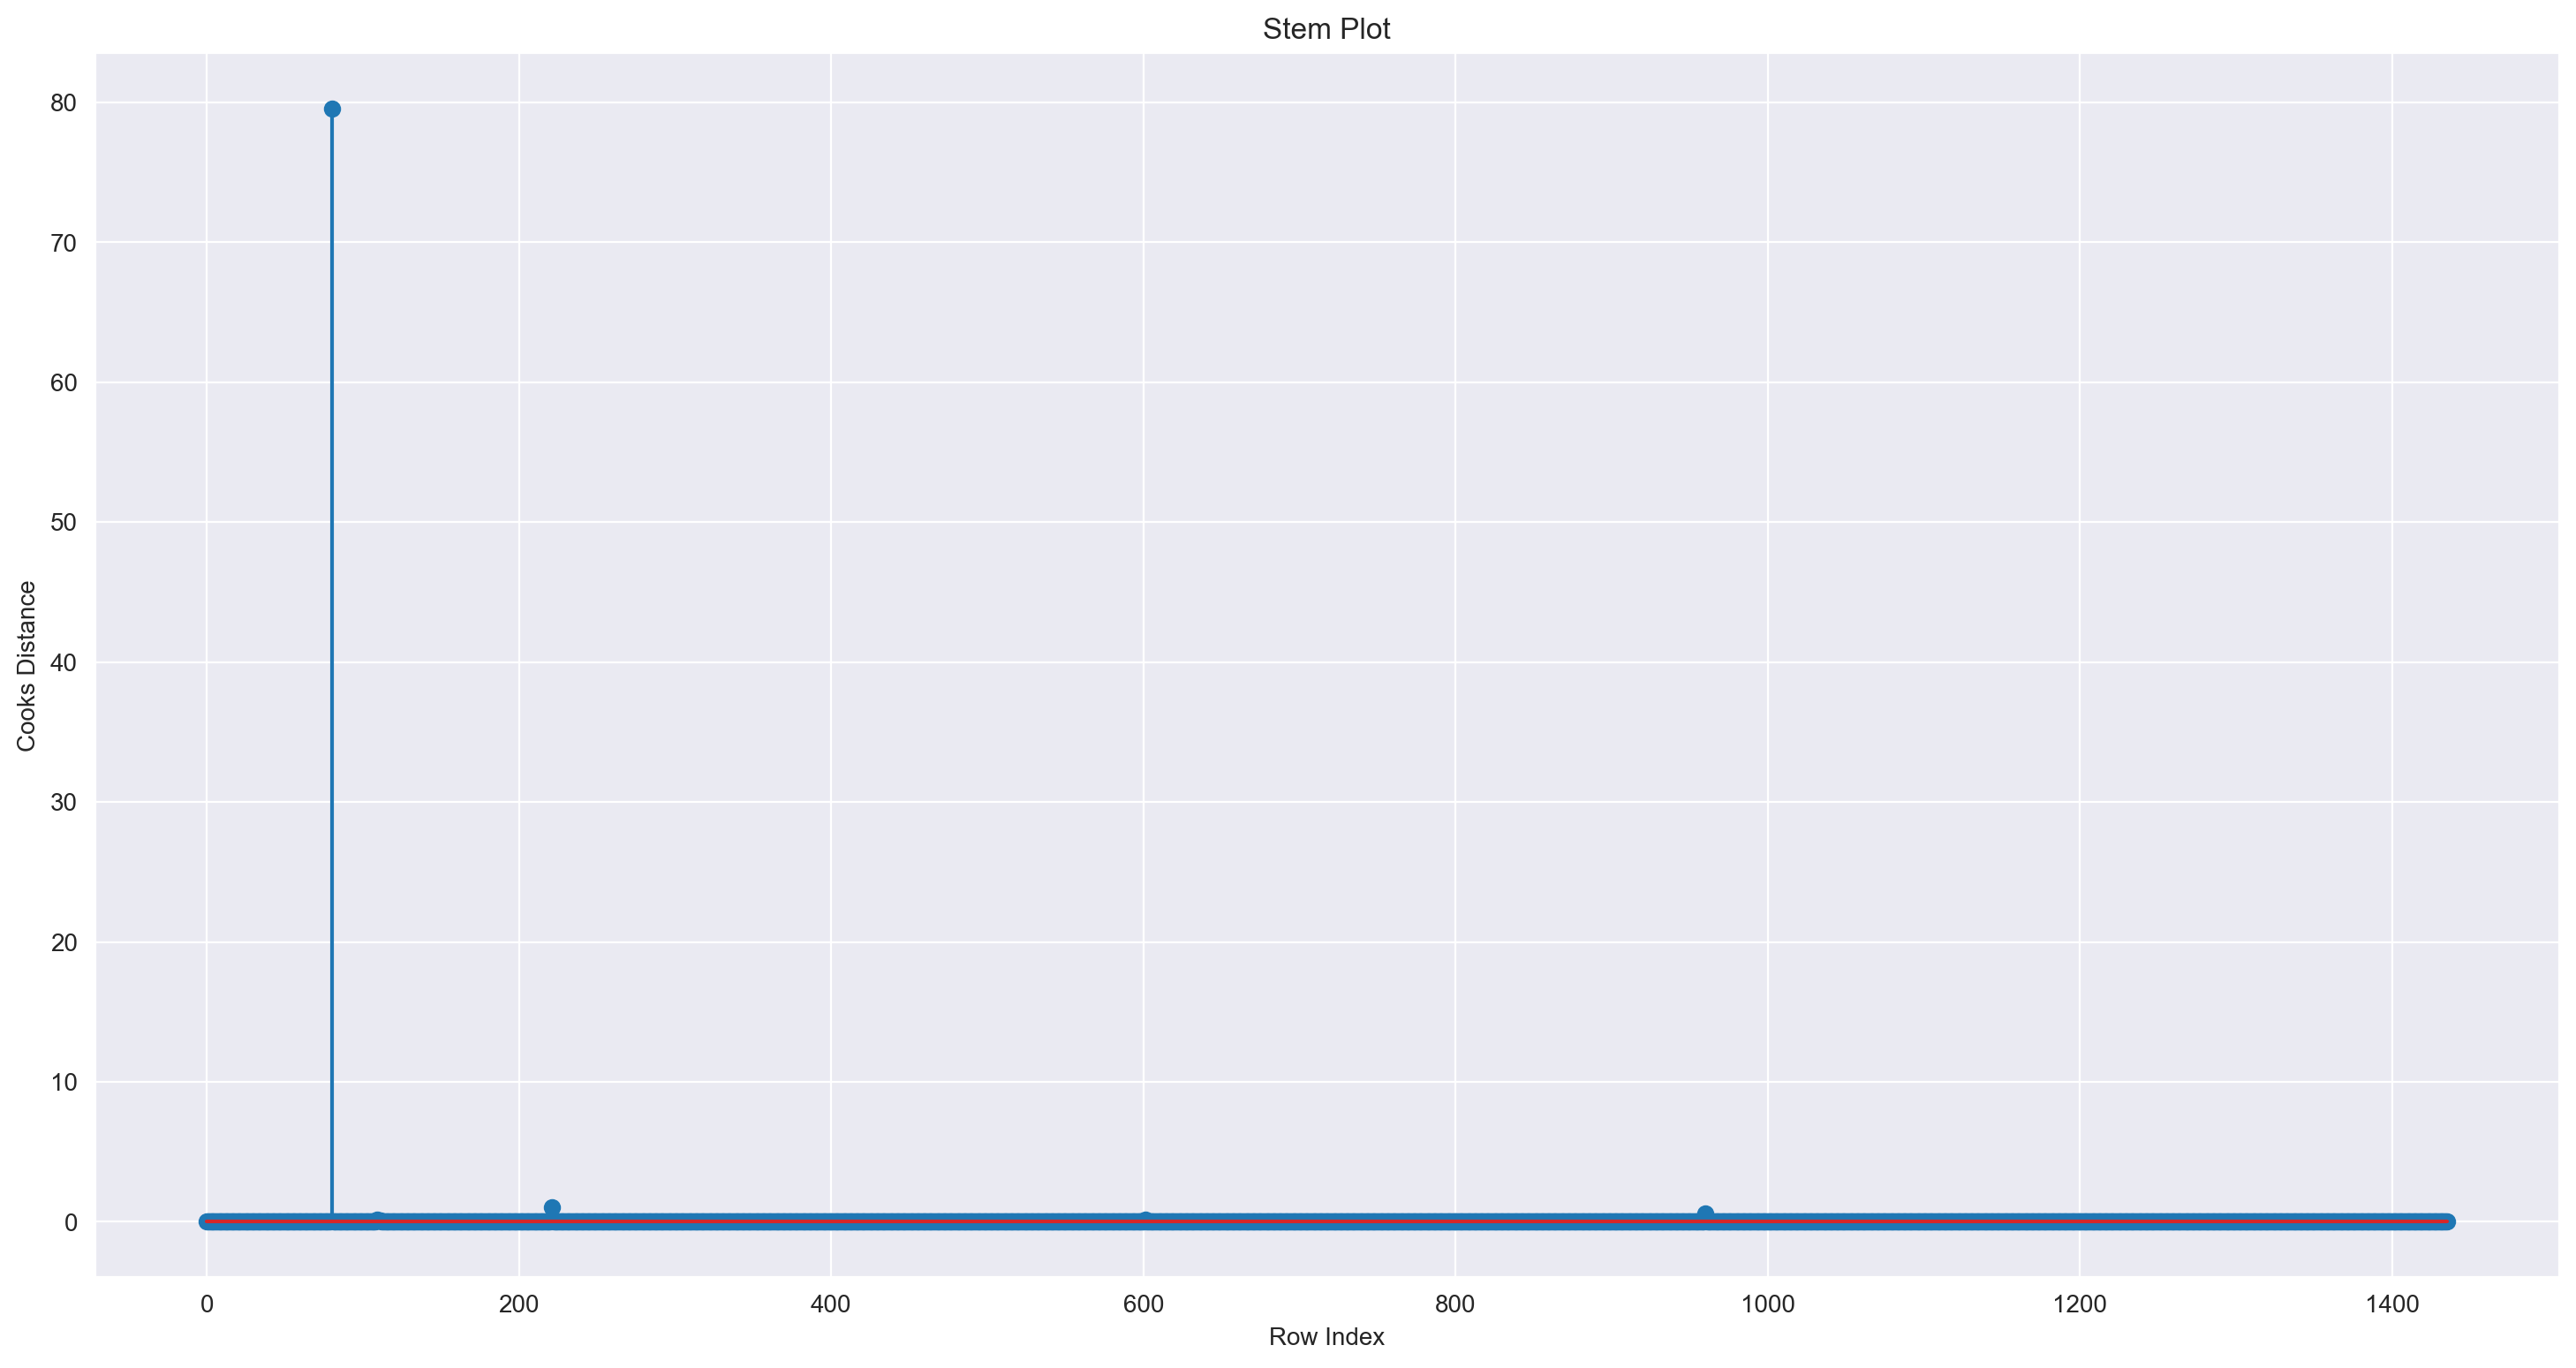

In [34]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(18,9))
plt.stem(np.arange(len(new)),np.round(c,97))
plt.title('Stem Plot')
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

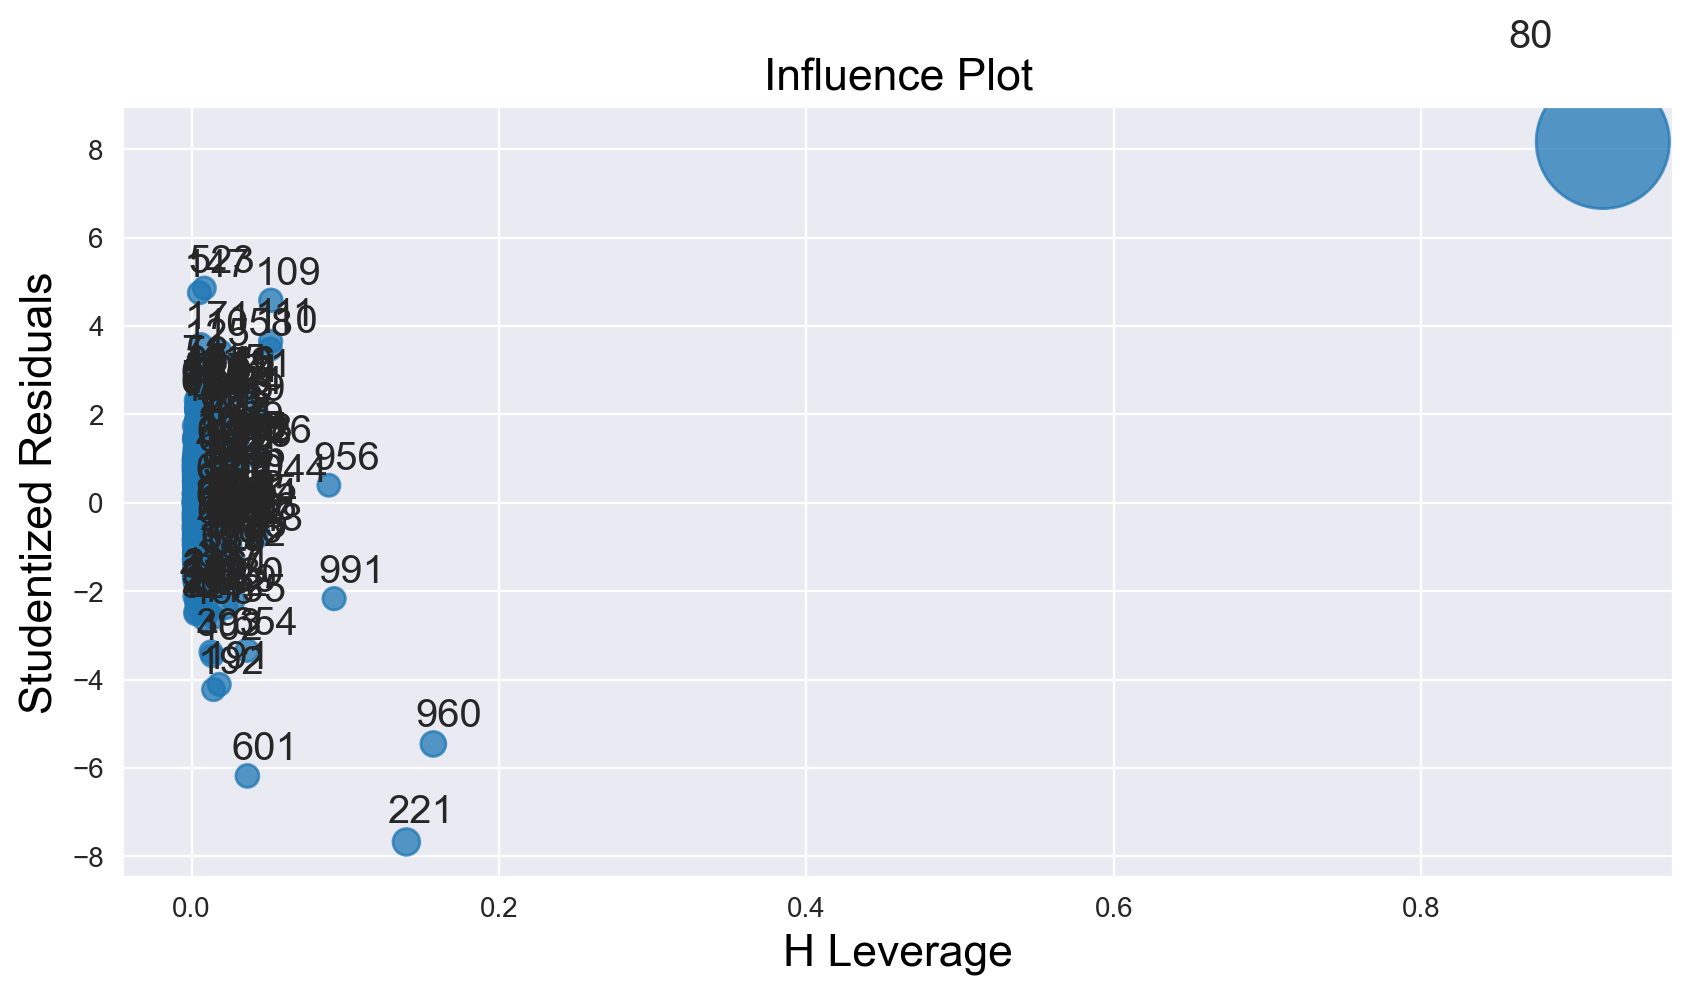

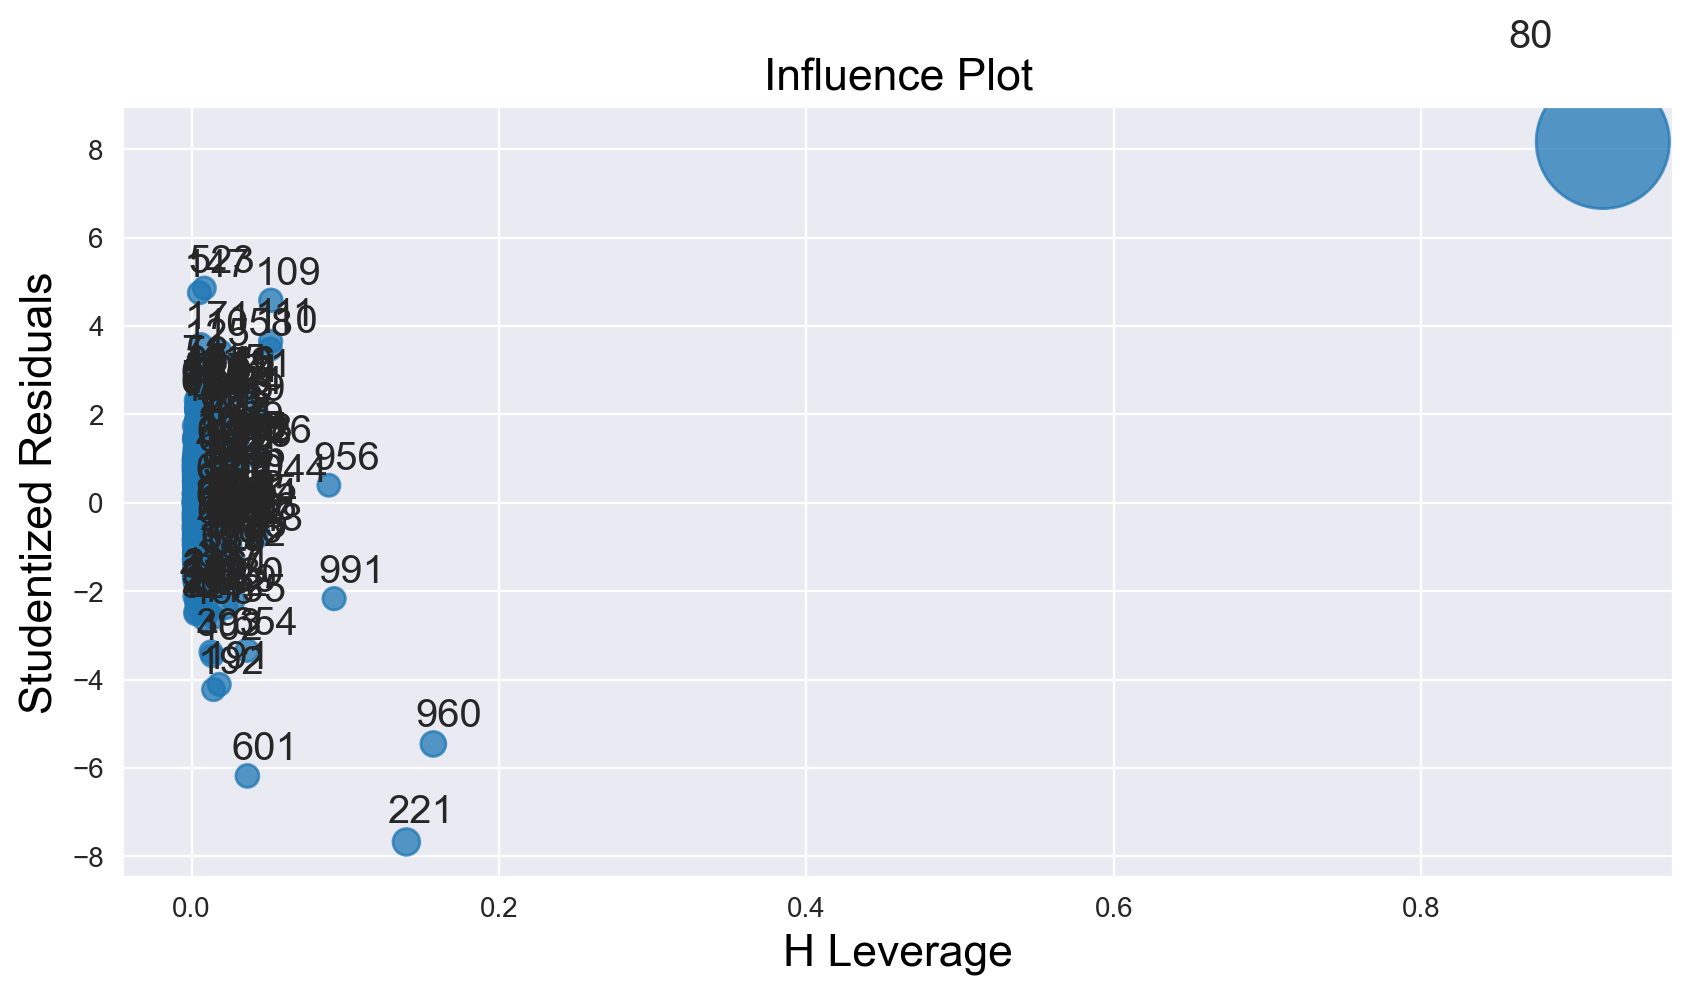

In [35]:
influence_plot(model)

In [36]:
new[new.index.isin([221])]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
221  12450         44  74172  110  1600      5      5            163    1615

In [37]:
df1=new.drop(new.index[[221]],axis=0).reset_index(drop=True)
df1

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [38]:
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [39]:
df2=new.drop(new.index[[601]],axis=0).reset_index(drop=True)
df2

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [40]:
df3=new.drop(new.index[[960]],axis=0).reset_index(drop=True)
df3

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   7500         69  20544   86  1300      3      5             69    1025
1431  10845         72  19000   86  1300      3      5             69    1015
1432   8500         71  17016   86  1300      3      5             69    1015
1433   7250         70  16916   86  1300      3      5             69    1015
1434   6950         76      1  110  1600      5      5             19    1114

[1435 rows x 9 columns]

In [41]:
while np.max(c)>0.5:
    model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data = df3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    df3=df1.drop(df3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    df3
else:
    final_model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=df3).fit()
    final_model.rsquared,final_model.aic
    print('Thus model accuracy is improved to',final_model.rsquared)

Thus model accuracy is improved to 0.8393899665060505


In [42]:
#index of the data points where c is more than .5
(np.argmax(c),np.max(c))

(108, 0.14897804681049234)

In [43]:
k=new.shape[1]
n=new.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020891364902506964

In [44]:
model.rsquared

0.8395746861007849

In [45]:
new_data=pd.DataFrame({'Age_08_04':60,'KM':19025,'HP':2200,'cc':216,'Doors':2,'Gears':5,'Quarterly_Tax':4252,'Weight':735},index=[0])
new_data

Age_08_04     KM    HP   cc  Doors  Gears  Quarterly_Tax  Weight
0         60  19025  2200  216      2      5           4252     735

In [46]:
final_model.predict(new_data)

0    170027.041554
dtype: float64

In [47]:
pred_y=final_model.predict(new)
pred_y

0       17013.724556
1       16493.043600
2       16983.240848
3       16584.415677
4       16229.738405
            ...     
1431     8732.874203
1432     8354.889046
1433     8531.017355
1434     8669.345082
1435     8776.264400
Length: 1436, dtype: float64

In [48]:
S2={'Prep_Model':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
r2table=pd.DataFrame(S2)
r2table

Prep_Model  Rsquared
0        Model  0.839575
1  Final_Model  0.839390